# Seattle Airbnb - Data Analysis & Blog


<a id="TableContent"></a>
## Table of Content

* [1. Introduction](#Introduction)
    * [1.1. Goals](#Goals)
    * [1.2. Ideas](#Ideas)
    * [1.3. Libraries](#Libraries)
* [2. The Data](#TheData)
    * [2.1. Data Sample](#DataSample)
    * [2.2. Data Cleaning](#DataCleaning)
        * [2.2.1. Calendar Dataset](#CalendarDataset)
        * [2.2.2. Listings Dataset](#ListingsDataset)
        * [2.2.3. Reviews Dataset](#ReviewsDataset)
* [3. Exploration and Modelling](#Modelling)
    * [3.1. Question 1: What's the role of Seasonality in Airbnb Listings Prices?](#Seasonality)
    * [3.2. Question 2: How is the Average Pricing spread accross the main characteristics of the Airbnb Listings?](#Characteristics)
    * [3.3. Question 3: How accurately can we predict the Price of the Listings?](#Prediction)
        * [3.3.1. Data Pre-Processing](#DataPreProcessing)
        * [3.3.2. Modelling - Linear Regression](#LinearRegression)
        * [3.3.3. Modelling - Other Models](#OtherModels)
* [4. Conclusion](#Conclusion)


<a id="Introduction"></a>
## 1. Introduction


As a young professional looking to boost his "Data" career progression I have personally made the choice to move to Seattle next year. This decision was made after some thorough research, where I came to realize Seattle matched every aspect of the lifestyle I wanted to have as a young professional seeking to have an impact in the tech world while having the time to explore the beauty of nature surrounding the city.

Being a couple months away from the move I decided I would spend 2 weekends in Seattle to explore areas where I would feel "at home" and compare neighbourhoods/regions based on a set of criteria that would help me derive the best decision further in time. 

Having a bit of free-time, I pushed myself to enroll in a personal challenge: Explore Airbnb Listings Data to create an in-depth understanding of when, where, and what makes the difference in pricing when it comes to rent a property in **Airbnb.com**. This came right in time, as I always back-up my personal moves/choices wiht some prior rational investigation. Tu put it in another way, moving to Seattle would mean a tighter management of my expenses, this meant, sacrificing some of my personal wishes, such as settling in a artistic neighbourhood, logically the more expensive ones, to find the adequate balance in terms of spending and finding the best location possible.

While reflecting on this exploration, questions started bumping into my mind.. What if I could rent a 2-bedroom place and start renting it on Airbnb, how big of a risk would this be? How are properties priced and how are prices spread out based on location? Are there any high and low seasons in the renting ecosystem? What could influence the pricing? 

These helped somehow frame the analysis and write some important key guidelines to keep in mind while making progress.



<a id="Goals"></a>
## 1.1 Goals

 After regrouping all the questions, I prioritized the ones that would help me the most if I were to put a bedroom available for rental via **Airbnb.com**: 
 
 1. ***What's the role of Seasonality in Airbnb Listings Prices?***
 
     - Average Price per day accross the Year
     - Minimum and Maximum Price Spread per day accross the Year
     - Deep Dive: Average Price per day accros each Month
     - Deep Dive: Average Price per day of the Week, Month and Year
 
 
 2. ***How is the Average Pricing spread accross the main characteristics of the Airbnb Listings?***
 
     - Top listings based on Neighbourhoods and Average Price per Neighbourhood
     - Top listings based on Property Types and Average Price per Property Type
     - Top listings based on Number of People it can accomodate and Average Price per Number of People it can accomodate
     
 
 3. ***How accurately can we predict the Price of the Listings?***
 
     - Linear Regression - Dep. Variable: Price and Ind. Variables: Set of features
     - Other Models
     - Explanatory power of each Feature based on coefficients

<a id="Ideas"></a>
## 1.2. Ideas

Describe new ideas to be explored based on findings - To be explored in a second analysis 

- What to expect in terms of cleaning fee and how much it increases the price on average?
- What are the concepts hosts and guests are using to describe their residence and experiences?
...

<a id="Libraries"></a>
## 1.3. Libraries

In [547]:
#Airbnb Color Palette function - https://www.color-name.com/airbnb.color#color-palettes
def airbnb_color_palette():
    coral = '#FF585D'
    gold = '#FF9C9F'
    dgold = '#FFBDBF'
    ddgold = '#53462D'
    yellow = '#F5AC58'
    blue = '#04BFAD'
    orange = '#F78761'
    red = '#F25E5E'
    dgrey = '#282834'
    lgrey = '#E5E5EB'
    dark = '#0D0D0F'
    airbnb_colors = ['#FF585D', '#FFBDBF', '#FF9C9F', '#F5AC58', '#FFDEDF', '#F5AC58', '#04BFAD', 
                 '#993639', '#662426', '#F25E5E', '#282834', '#E5E5EB', '#4D1B1D']
    palette = sns.set_palette(sns.color_palette(airbnb_colors))
    return palette

In [877]:
#Import Libraries

#General
from datetime import datetime
from datetime import timedelta
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import calplot
from IPython.display import Image

#Machine Learning librarries
from scipy import stats
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

#Pandas set up 
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
pd.set_option('display.precision', 1)

<a id="TheData"></a>
# 2. The Data

<a id="DataSample"></a>
## 2.1. Data Sample

[Return to Table of content](#TableContent)

In [364]:
#Parameters of the analysis

#Path to data
data_path = 'C:/Users/robin.hocepied/Seattle_Airbnb_Use_Case_Udacity/'
if not os.path.isdir(data_path):
    os.mkdir(data_path)

In [778]:
#Data Import 

#Read CSVs

#Import data
#1. Calendar
calendar_df = pd.read_csv(data_path + "calendar.csv")
print('1. Calendar - Number of Samples: {:,}'.format(calendar_df.shape[0]))

#2. Listings
listings_df = pd.read_csv(data_path + "listings.csv")
print('2. Listings - Number of Samples: {:,}'.format(listings_df.shape[0]))

#3. Reviews
reviews_df = pd.read_csv(data_path + "reviews.csv")
print('3. Reviews - Number of Samples: {:,}'.format(reviews_df.shape[0]))

1. Calendar - Number of Samples: 1,393,570
2. Listings - Number of Samples: 3,818
3. Reviews - Number of Samples: 84,849


<a id="DataCleaning"></a>
## 2.2. Data Cleaning

<a id="CalendarDataset"></a>
### 2.2.1 Calendar Dataset

[Return to Table of content](#TableContent)

In [21]:
#Check Data Types
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   listing_id  1393570 non-null  int64  
 1   date        1393570 non-null  object 
 2   available   1393570 non-null  bool   
 3   price       934542 non-null   float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 33.2+ MB


In [17]:
#Overview of the Data
calendar_df.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [779]:
#Details of the columns
print('1. Listing ID Column - Number of Unique Listing IDs: {:,}'.format(calendar_df.listing_id.nunique()))
print('2.1 Date Column - Starting Date: {}'.format(calendar_df.date.min()))
print('2.2 Date Column - Ending Date: {}'.format(calendar_df.date.max()))
print('3. Available Column - Number of Unique Available: {}'.format(calendar_df.available.unique()))
print('4. Price Column - Percentage of NaNs in Price Column: {}'.format(round(calendar_df.price.isnull().sum()/calendar_df.shape[0], 2)))

1. Listing ID Column - Number of Unique Listing IDs: 3,818
2.1 Date Column - Starting Date: 2016-01-04
2.2 Date Column - Ending Date: 2017-01-02
3. Available Column - Number of Unique Available: ['t' 'f']
4. Price Column - Percentage of NaNs in Price Column: 0.33


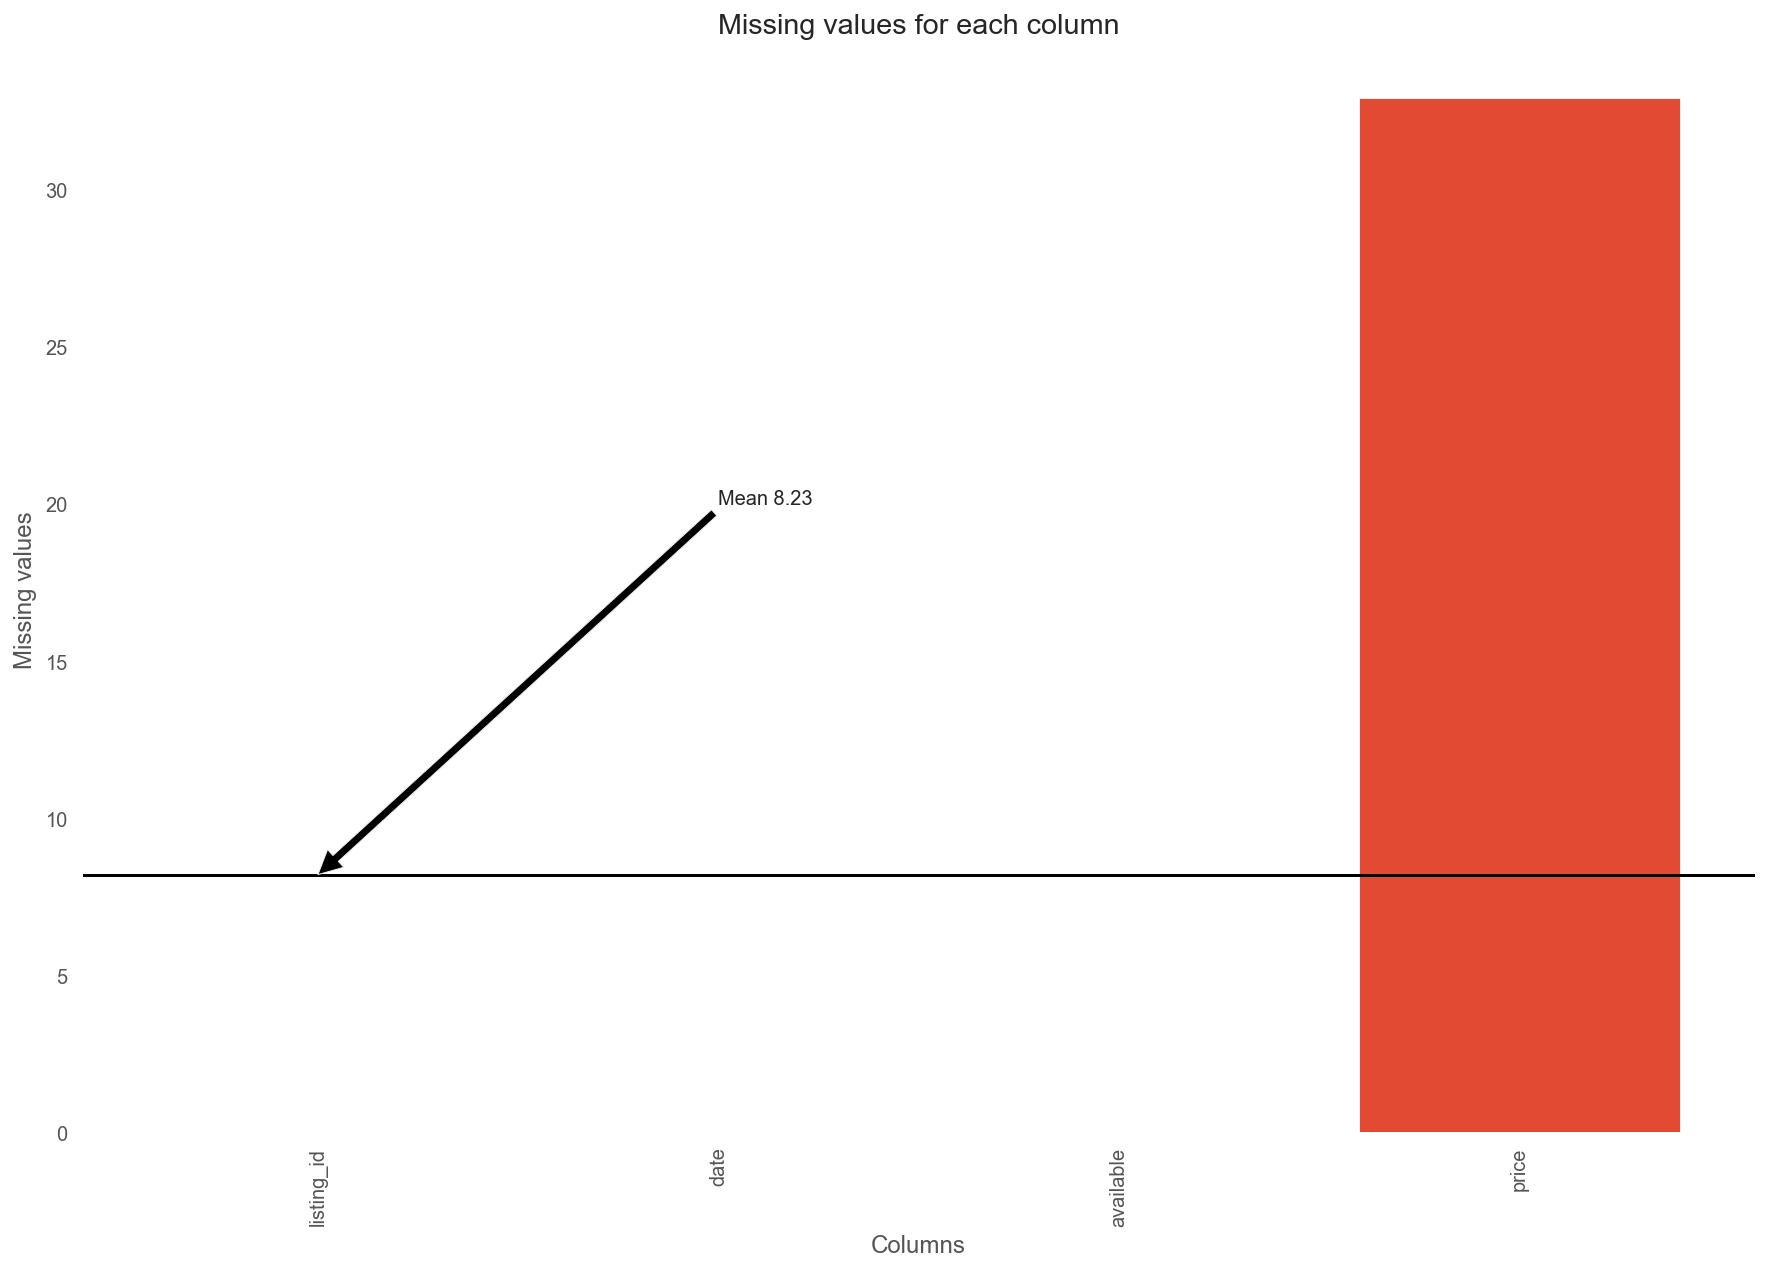

In [783]:
#Visualize missing values

#Missing Values
missing_percent = [(calendar_df[series].isnull().sum()/len(calendar_df[series]))*100 for series in list(calendar_df) ]
#labels
headers_missing = [series for series in list(calendar_df)  ]
#Mean of missing values
mean = np.mean(missing_percent)

#Bar Plot
fig, ax = plt.subplots(figsize=(15,10))
ax.set_facecolor('white')

plt.bar(headers_missing, missing_percent)
plt.title("Missing values for each column")
plt.xlabel("Columns")
plt.ylabel("Missing values")
plt.xticks(rotation=90)

#Mean line
plt.axhline(y=mean, c='black', label='"Mean"')
ax.annotate('Mean {}'.format(round(mean,2)), xy=(0, mean), xytext=(1, 20), arrowprops=dict(facecolor='black', shrink=5),)

plt.show()

**Remarks**: 

0. The available column is not stored as a boolean
1. The Price column is not stored as a Float or Numeric
2.1 The Price column has some data points with a dollar sign
2.2 The Price column has some data points with a comma (Only realized this after removing the $ and getting an error message when converting to numeric)
3. The Price column has NaNs

**Apply Modifications to Dataset**

In [784]:
#Price Column
calendar_df['price'] = calendar_df['price'].str.replace('$','').str.replace(',','')
calendar_df['price'] = pd.to_numeric(calendar_df['price'])

#Available Column
calendar_df['available'] = calendar_df['available'] == "t"

#Date Column
calendar_df['date'] = pd.to_datetime(calendar_df['date'])

<a id="ListingsDataset"></a>
### 2.2.2 Listings Dataset

[Return to Table of content](#TableContent)

In [416]:
#Check Data Types
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [229]:
# Descriptive Statistics
listings_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3818.00000,5550111.41854,2962660.47856,3335.00000,3258256.25000,6118244.50000,8035126.75000,10340165.00000
scrape_id,3818.00000,20160104002432.00000,0.00000,20160104002432.00000,20160104002432.00000,20160104002432.00000,20160104002432.00000,20160104002432.00000
host_id,3818.00000,15785555.10765,14583815.27469,4193.00000,3275204.00000,10558142.00000,25903093.25000,53208610.00000
host_listings_count,3816.00000,7.15776,28.62815,1.00000,1.00000,1.00000,3.00000,502.00000
host_total_listings_count,3816.00000,7.15776,28.62815,1.00000,1.00000,1.00000,3.00000,502.00000
latitude,3818.00000,47.62896,0.04305,47.50509,47.60942,47.62360,47.66269,47.73336
longitude,3818.00000,-122.33310,0.03174,-122.41722,-122.35432,-122.32887,-122.31080,-122.24061
accommodates,3818.00000,3.34940,1.97760,1.00000,2.00000,3.00000,4.00000,16.00000
bathrooms,3802.00000,1.25947,0.59037,0.00000,1.00000,1.00000,1.00000,8.00000
bedrooms,3812.00000,1.30771,0.88339,0.00000,1.00000,1.00000,2.00000,7.00000


In [39]:
# Overview of the Data
listings_df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.00000,3.00000,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.63629,-122.37103,t,Apartment,Entire home/apt,4,1.00000,1.00000,1.00000,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",nan,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.00000,10.00000,10.00000,10.00000,10.00000,9.00000,10.00000,f,nan,WASHINGTON,f,moderate,f,f,2,4.07000
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.00000,6.00000,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.63912,-122.36567,t,Apartment,Entire home/apt,4,1.00000,1.00000,1.00000,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",nan,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.00000,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000,f,nan,WASHINGTON,f,strict,t,t,6,1.480

In [786]:
# Details of the columns
print('1. Listing ID Column - Number of Unique Listing IDs: {:,}'.format(listings_df.id.nunique()))
print('2. City Column - Number of Unique Cities: {}'.format(listings_df.city.nunique()))
print('3. Neighbourhood Column - Number of Unique Neighbourhoods: {}'.format(listings_df.neighbourhood.nunique()))
#print('4. Super Host Column - Number of Unique Super Hosts: {}'.format(listings_df.host_is_superhost.value_counts()))

#Nb of listings and Number of hosts
print('4. Listings and Hosts Columns -  {:,} listings provided by {:,} hosts'.format(listings_df['id'].count(), 
                                                                                              listings_df['host_id'].nunique()))

1. Listing ID Column - Number of Unique Listing IDs: 3,818
2. City Column - Number of Unique Cities: 7
3. Neighbourhood Column - Number of Unique Neighbourhoods: 81
4. Listings and Hosts Columns -  3,818 listings provided by 2,751 hosts


Number of columns with missing data: 45


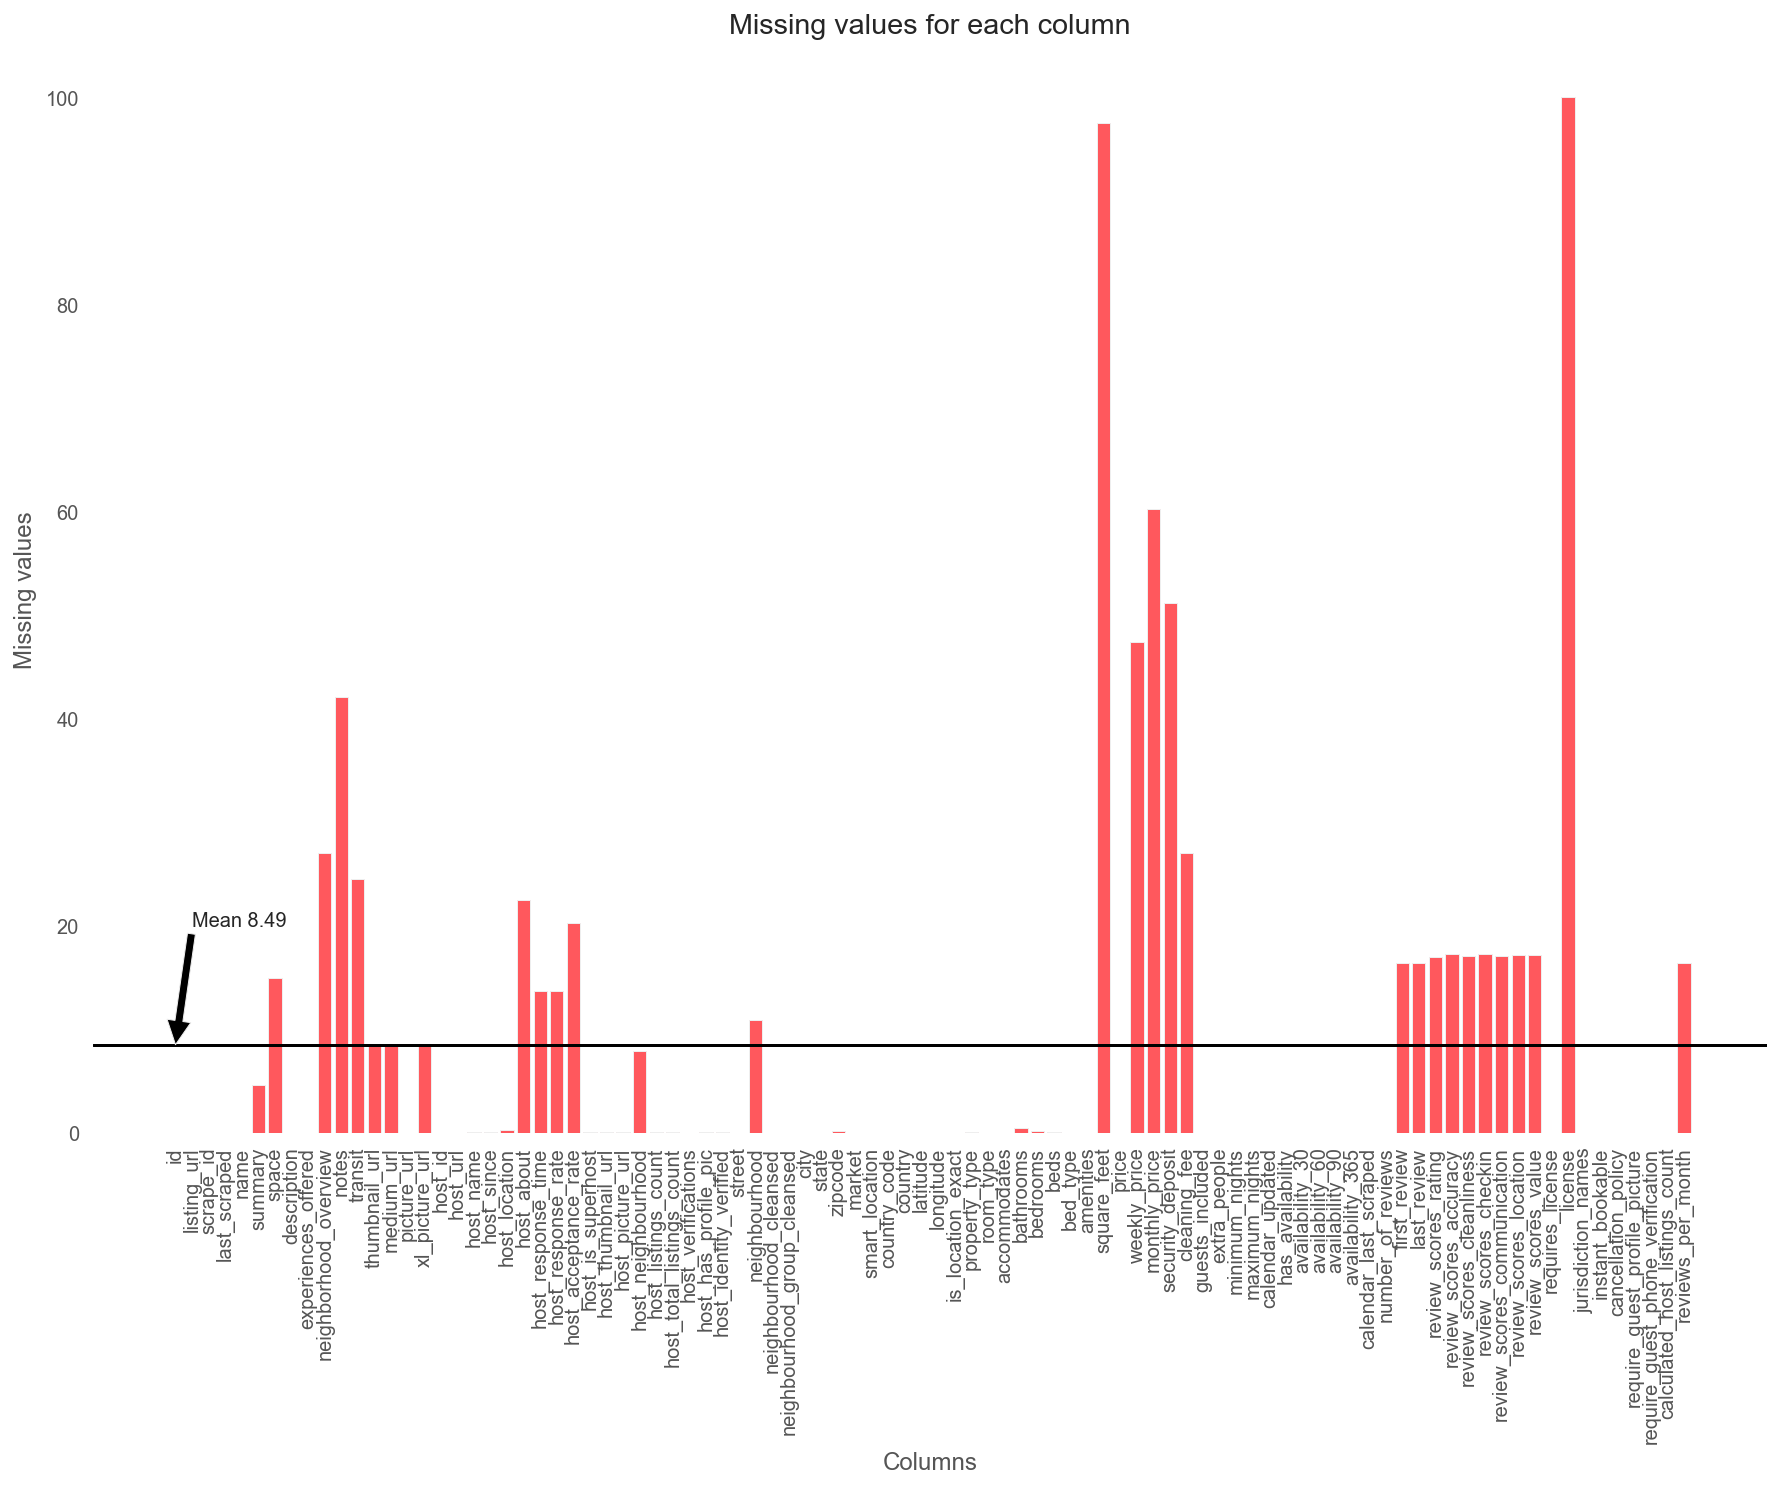

In [787]:
#Visualize missing values

#Missing Values
missing_percent = [(listings_df[series].isnull().sum()/len(listings_df[series]))*100 for series in list(listings_df) ]
#Labels
headers_missing = [series for series in list(listings_df)  ]
#Mean
mean = np.mean(missing_percent)

#Bar plot
fig, ax = plt.subplots(figsize=(15,10))
ax.set_facecolor('white')

plt.bar(headers_missing, missing_percent, color = '#FF585D')
plt.title("Missing values for each column")
plt.xlabel("Columns")
plt.ylabel("Missing values")

#Mean line
plt.axhline(y=mean, c='black', label='"Mean"')
ax.annotate('Mean {}'.format(round(mean,2)), xy=(0, mean), xytext=(1, 20), arrowprops=dict(facecolor='black', shrink=5),)

plt.xticks(rotation=90)
plt.box(False);

#Nulls columns
null_col = listings_df.columns[listings_df.isna().sum()>0]
col_null_val = listings_df[null_col].isna().sum().sort_values(ascending=False)
nulls_df = pd.DataFrame(col_null_val,columns=['#Nulls'])
print('Number of columns with missing data:',nulls_df.shape[0])

**Remarks**: 

0. 45 columns with missing values, explore them and define threshold
1. Check if we have columns with one single value and remove them
2. Identify columns that seem unvaluable, with text, with floats and with categorical variables
3. As in the Calendar DF, we will replace ',' and '$' from the price column
4. Remove '%' from percentages fields
5. As in the Calendar DF, transform 't/f' columns into booleans
6. Create dummy variables based on the selection of categorical variables
7. Redefine amenities column as one column per amenity


**Apply Modifications to Dataset**

In [789]:
# Segment columns into lists based on type and value for the scope of the analysis

# Columns defined as a Cost: Price, Deposit, Cleaning Fee and Extra People Charge
cost_columns = ['price','security_deposit','cleaning_fee','extra_people', 'guests_included']

#Columns defined as Host Reactiveness and Proactiveness: 
pct_columns = ['host_response_rate','host_acceptance_rate']

#Columns defined as Useful Categorical variables
cat_columns = ['host_response_time','neighbourhood_group_cleansed','property_type','room_type'
                   ,'bed_type','cancellation_policy']

#Columns to be redefined as one column: Amenities
amenities_column = ['amenities']

# Columns defined as unvaluable: URLs, Geo location, Host Name, Extra Neighbourhood columns, Location items, 
#Calendar update, Extra Review columns, Host verification, Monthly and Weekly Price
columns_with_no_value = ['id','listing_url','thumbnail_url','medium_url','picture_url'
                    ,'xl_picture_url','host_id','host_url','host_thumbnail_url'
                    ,'host_picture_url','latitude','longitude','host_name'
                    ,'neighbourhood','state','street', 'city','zipcode', 'smart_location'
                    ,'calendar_updated', 'first_review', 'last_review', 'neighbourhood_cleansed'
                    ,'host_verifications', 'monthly_price', 'weekly_price', 'name','summary'
                    ,'space','description','neighborhood_overview','notes','transit'
                    ,'host_about','host_location','host_neighbourhood']


In [790]:
# Step before data cleaning: Remove columns with missing values only
listings_df = listings_df.dropna(axis=1, how='all')

In [791]:
# Step 0: Remove columns with missing values above a 90% threshold
# The remaining missing value columns will be handled later in the analysis
missing_values = list(listings_df.columns[listings_df.isnull().mean() >= 0.9])
#Drop columns
listings_df = listings_df.drop(list(missing_values_only),axis=1)

In [792]:
# Step 1: Remove columns with the same value
#Extract list of Nb of uniques per column
nb_unique = listings_df.apply(pd.Series.nunique)
#Index of columns with one unique value
cols_with_one_unique_value = nb_unique[nb_unique == 1].index
#Remove selected columns
listings_df = listings_df.drop(list(cols_with_one_unique_value), axis=1)

In [793]:
# Step 2: Remove columns that seem unvaluable for the scope of the analysis
listings_df = listings_df.drop(columns_with_no_value, axis=1)

In [794]:
# Step 3: Remove $ and commas from "Cost" columns selection
for col in cost_columns:
    listings_df[col] = listings_df[col].astype(str).str.replace('$','').str.replace(',','').astype(float)

In [795]:
# Step 4: Remove % sign from "Pct" columns selection
for col in pct_columns:
    listings_df[col] = listings_df[col].str.replace('%','').astype(float)/100

In [796]:
# Step 5: Change 't/f' columns to boolean types
for col in listings_df.columns:
        if list(listings_df[col].dropna().unique()) == ['f', 't'] or list(listings_df[col].dropna().unique()) == ['t', 'f']:
            listings_df[col] = listings_df[col].replace('t',1).replace('f',0)

In [797]:
# Create dummy variables for "Cat" columns selection 
for col in cat_columns:
    listings_df = pd.concat([listings_df, pd.get_dummies(listings_df[col], prefix=col 
                 , prefix_sep='_', drop_first=False, dummy_na = False)], axis=1)
    
# We kept the categorical columns so we can draw some visualizations from it

In [798]:
#Copy DF
listings_clean_df = listings_df.copy()

In [799]:
# Last check on the df
listings_clean_df.head()

#Comments: We still need to redistribute the amenities columns into several ones -> Not in this analysis

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,2011-08-11,within a few hours,0.96000,1.00000,0.00000,3.00000,3.00000,1.00000,1.00000,Queen Anne,1,Apartment,Entire home/apt,4,1.00000,1.00000,1.00000,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.00000,nan,nan,2.00000,5.00000,1,365,14,41,71,346,207,95.00000,10.00000,10.00000,10.00000,10.00000,9.00000,10.00000,0,moderate,0,0,2,4.07000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,2013-02-21,within an hour,0.98000,1.00000,1.00000,6.00000,6.00000,1.00000,1.00000,Queen Anne,1,Apartment,Entire home/apt,4,1.00000,1.00000,1.00000,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.00000,100.00000,40.00000,1.00000,0.00000,2,90,13,13,16,291,43,96.00000,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000,0,strict,1,1,6,1.48000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,2014-06-12,within a few hours,0.67000,1.00000,0.00000,2.00000,2.00000,1.00000,1.00000,Queen Anne,1,House,Entire home/apt,11,4.50000,5.00000,7.00000,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.00000,1000.00000,300.00000,10.00000,25.00000,4,30,1,6,17,220,20,97.00000,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000,0,strict,0,0,2,1.15000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
3,2013-11-06,NaN,nan,nan,0.00000,1.00000,1.00000,1.00000,1.00000,Queen Anne,1,Apartment,Entire home/apt,3,1.00000,0.00000,2.00000,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",100.00000,nan,nan,1.00000,0.00000,1,1125,0,0,0,143,0,nan,nan,nan,nan,nan,nan,nan,0,flexible,0,0,1,nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0

<a id="ReviewsDataset"></a>

### 2.2.3 Reviews

[Return to Table of content](#TableContent)

In [800]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [43]:
# Overview of the Data
reviews_df.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."


In [801]:
# Details of the columns
print('1. Listing ID Column - Number of Unique Reviews IDs: {:,}'.format(reviews_df.listing_id.nunique()))

1. Listing ID Column - Number of Unique Reviews IDs: 3,191


In [802]:
# Visualize missing values - Only one comment with missing values (can't use the plot)
print('1. Comments Column - {} missing rows'.format(reviews_df.comments.isna().sum()))

1. Comments Column - 18 missing rows



<a id="Modelling"></a>
# 3. Exploration and Modelling


<a id="Seasonality"></a>

## 3.1 Question 1: What's the role of Seasonality in Airbnb Listings Prices?


[Return to Table of content](#TableContent)

This question will firstly help me determine if seasonality does have an impact on price and secondly help me assess when during the year do we have the lowest prices.

In other words, this question could be rephrased by: When should I travel to Seattle when I am on tight budget?

To do this, two key metrics will help me assess it:

0. Number of Listings
1. Average Price 
2. Minimum and Maximum Price Spread 

To incorporate the seasonality view, I will compute these metrics per day, day of the week and month.

In [891]:
#Compute metrics
avg_price_calendar_df = calendar_df.groupby('date').agg(
    #Number of listings
    nb_listings=('listing_id', 'count'),
    # Get total price for each day
    total_price=('price', 'sum'),
    # Get average price for each day
    avg_price=('price', 'mean'),
    # Get max price for each day
    max_price=('price', 'max'),
    # Get min price for each day
    min_price=('price', 'min')
).reset_index()

In [892]:
#Nb of listings
avg_price_calendar_df.nb_listings.unique()

array([3818], dtype=int64)

In [893]:
#Overview
avg_price_calendar_df.head(3)

,date,nb_listings,total_price,avg_price,max_price,min_price
0,2016-01-04,3818,211819.00000,122.08588,975.00000,25.00000
1,2016-01-05,3818,225312.00000,120.68131,950.00000,25.00000
2,2016-01-06,3818,220815.00000,120.92826,950.00000,25.00000


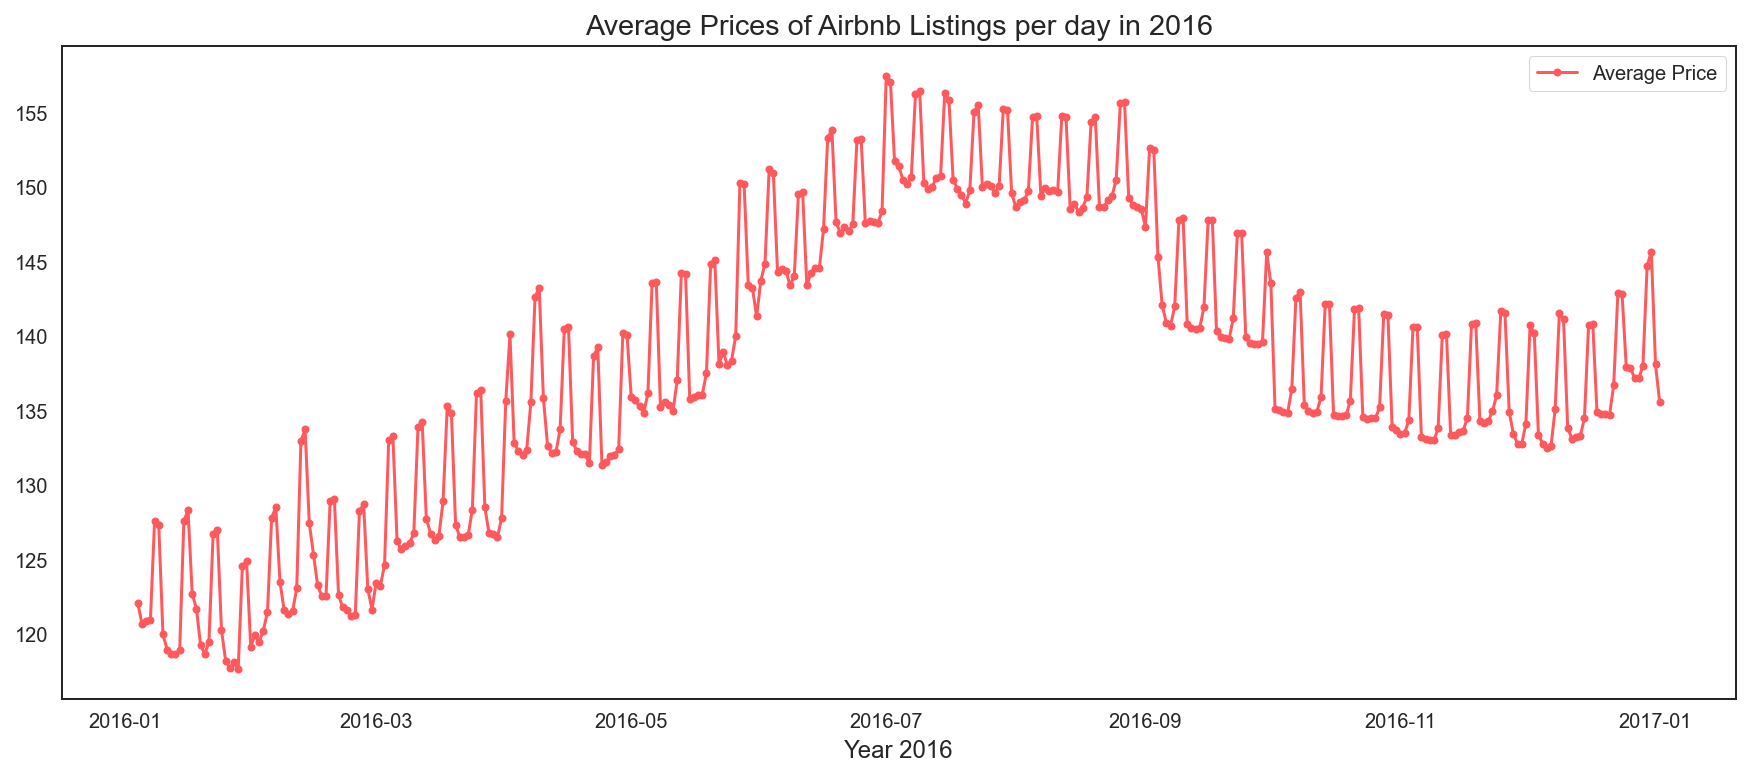

In [812]:
# Visualization of Avg Prices for 2016

# To set the plot size
fig, ax = plt.subplots(figsize=(15,6))

ax.set_facecolor('white')
  
# Plot
plt.plot(avg_price_calendar_df['date'], avg_price_calendar_df['avg_price'], label='Average Price', linestyle='-', marker='.', color = '#FF585D')
  
# Adding title to the plot
plt.title('Average Prices of Airbnb Listings per day in 2016')
  
# Adding Label to the x-axis
plt.xlabel('Year 2016')
  
# Adding legend to the curve
plt.legend()

# Plt show
plt.show()

The peak of the average prices can be found between July and September while the lowest prices are registered in the first month of the year. These trends may, indeed, relate to the temperatures and rainfall % per season. 

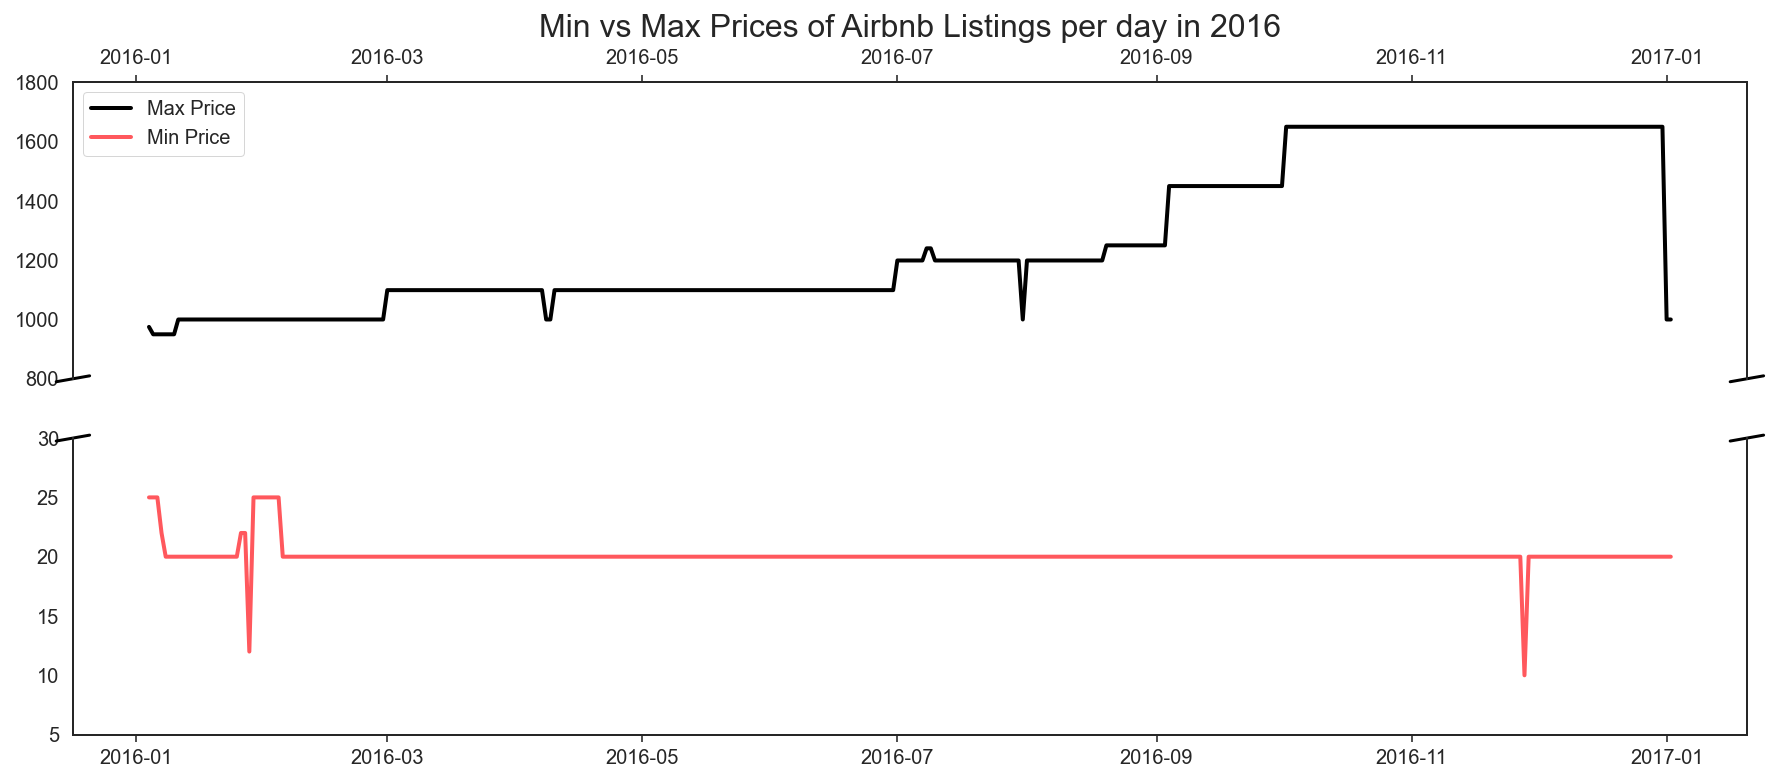

In [811]:
# Visualization of the  Min and Max Prices for 2016

# To set the plot size
f, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,6))
ax.set_facecolor('white')
ax2.set_facecolor('white')

# Data
y = avg_price_calendar_df['max_price']
y1 = avg_price_calendar_df['min_price']
x = avg_price_calendar_df['date']

# Plots
ax.plot(x,y,color = 'k',label = 'Max Price',linewidth = 2)
ax.plot(x,y1,color = '#FF585D',label = 'Min Price',linewidth = 2)
ax2.plot(x,y,color = 'k',label = 'Max Price',linewidth = 2)
ax2.plot(x,y1,color = '#FF585D',label = 'Min Price',linewidth = 2)

# Adding title to the plot
ax.set_title('Min vs Max Prices of Airbnb Listings per day in 2016', fontsize=16)

# Limits
#ax.grid(linewidth=1.5)
#ax2.grid(linewidth=1.5)
ax.set_ylim(800, 1800)  # upper data
ax2.set_ylim(5, 30)  # lower data 

# Merging and removing the middle horizontal axes
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off') 
ax2.xaxis.tick_bottom()

#Legend
ax.legend(['Max Price', 'Min Price'], loc='upper left')

# Modifying aesthetics of diagonal splitting lines
d = .01  
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  

plt.show()

If we compare the Max and Min Price, the Min Price does not move much from his range, while the Max Price progressively increases from July until January. This info does not tell us much as only one property can alter the range of Min and Max values. What might be interesting to do, it to compare Min and Max prices based on a specific category (Property Type, Neighbourhood, etc.)

But let's deep dive into each month and week so we can fine-tune our knowledge on Seasonality.

In [807]:
#Extract Month and Week from Date

#Day
calendar_df['day'] = calendar_df['date'].dt.day

#Week
calendar_df['day_of_week'] = pd.DatetimeIndex(calendar_df['date']).day_name()

#Month
calendar_df['month'] = calendar_df['date'].dt.month

#Year
calendar_df['year'] = calendar_df['date'].dt.year

Text(0.5, 0.98, 'Deep Dive: Average Prices of Airbnb Listings with breakdown per Month in 2016')

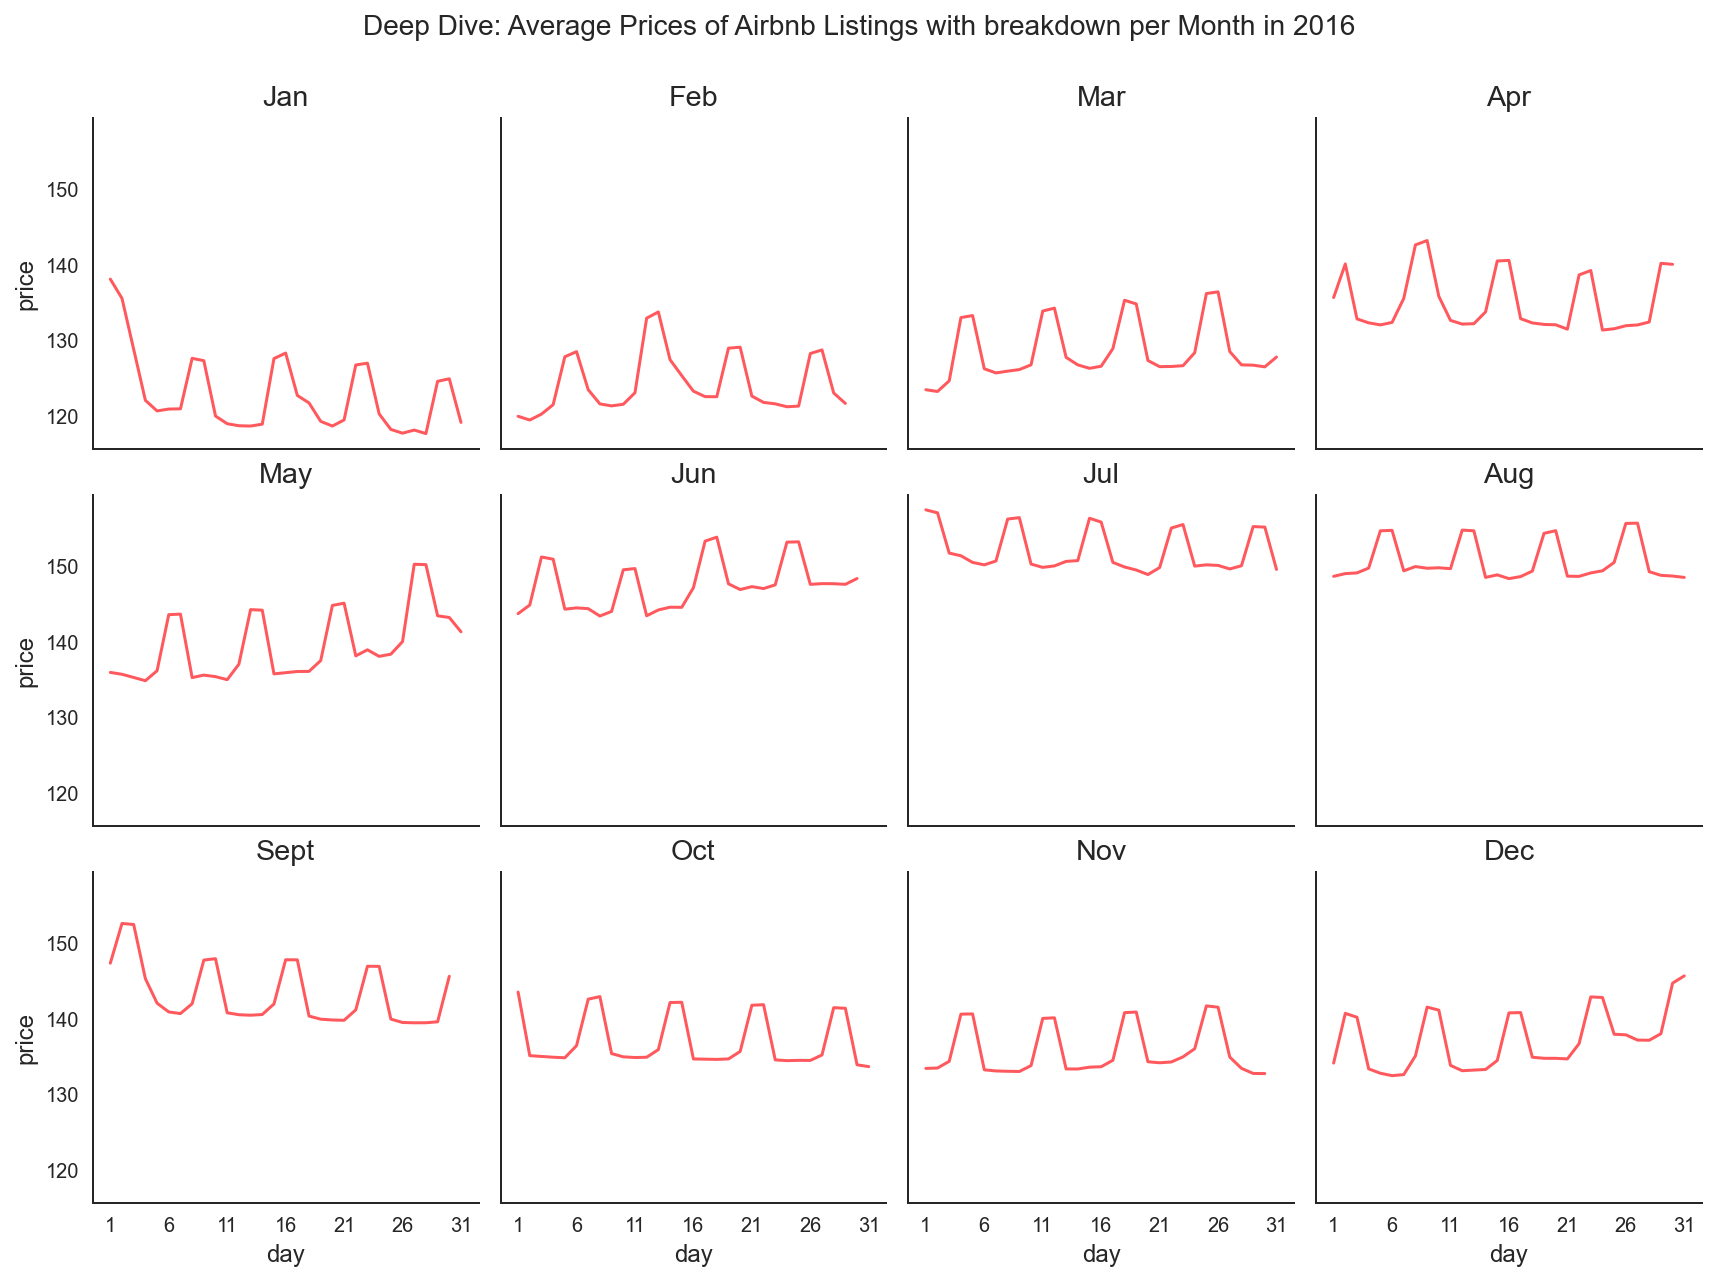

In [819]:
# Visualization of the Avg prices for 2016 - Breakdown per Month

#Background
sns.set_style("white")
#Plot Breakdown per month
plot = sns.FacetGrid(calendar_df, col="month", col_wrap=4)
plot.map(sns.lineplot, 'day', 'price', color = '#FF585D')

#Axes limits
plot.set(xticks=range(1, 32, 5))
axes = plot.axes.flatten()

#Map months
months = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
i = 1
for ax in plot.axes:
    ax.set_title(months[i])
    i += 1

# Adding title to the plot
plot.fig.subplots_adjust(top=0.9)
plot.fig.suptitle('Deep Dive: Average Prices of Airbnb Listings with breakdown per Month in 2016', fontsize=14)

In [184]:
#Quickly check the month of April Average Prices spikes to capture a potential Weekend trend

calendar_df[calendar_df['month']==4].groupby(['year', 'month', 'day_of_week']).agg(
    # Get total price for each day
    average_price=('price', 'mean')
).reset_index().sort_values(by=['average_price'], ascending=False)

,year,month,day_of_week,average_price
2,2016,4,Saturday,140.64702
0,2016,4,Friday,139.45798
4,2016,4,Thursday,133.30665
3,2016,4,Sunday,133.23545
1,2016,4,Monday,132.21826
6,2016,4,Wednesday,132.18706
5,2016,4,Tuesday,132.08074


A clear pattern can be depicted from each month, the average price tends to increase during Fridays and Saturdays (e.g. extracted from month of April). Hypothesis: Weekends diplay a higher demand, hence a higher average price.

Let's confirm this hypothesis with a heatmap.

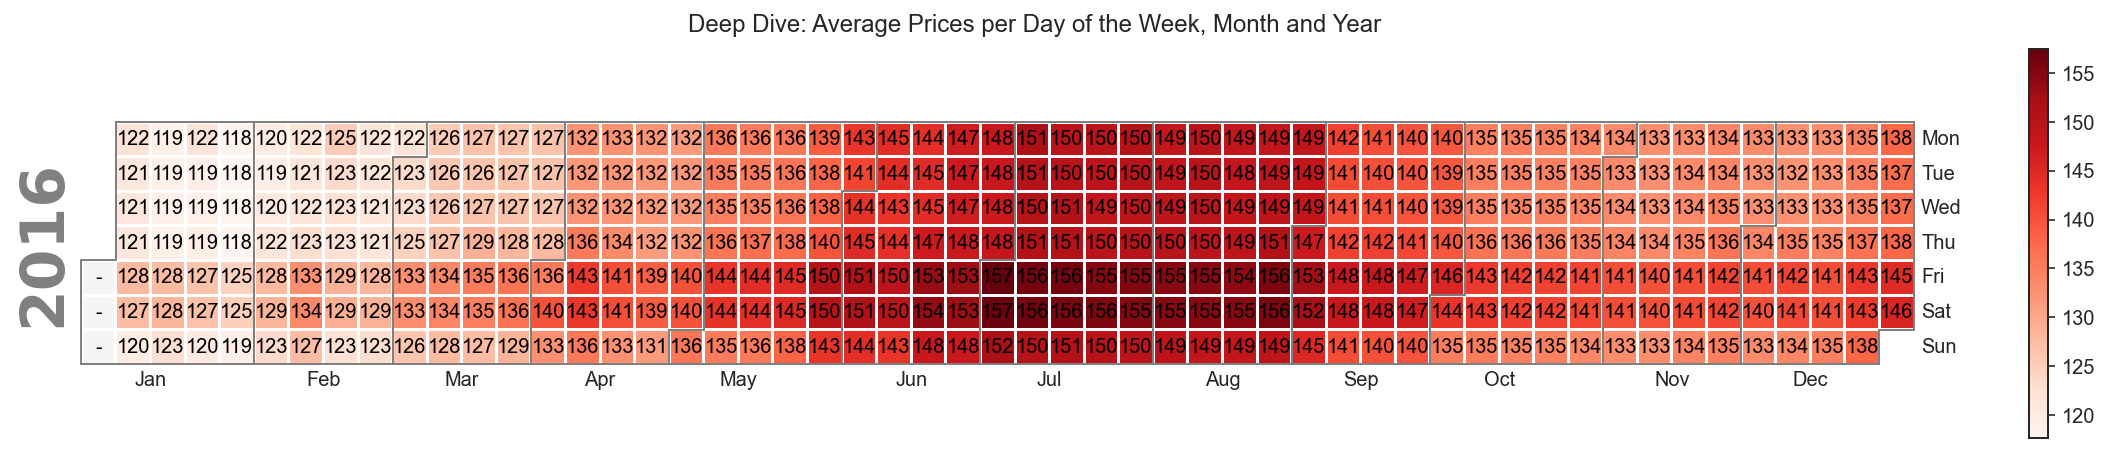

In [827]:
# Heatmap of Average Prices

#Filter on 2016 as we have one data point for 2017 and set date as index
data = calendar_df[calendar_df['year']==2016].set_index('date')

#Only keep Price
data = data['price']

#Heatmap
heatmap = calplot.calplot(data = data, how = 'mean', 
                      cmap = 'Reds', figsize = (17, 3), 
                      suptitle = "Deep Dive: Average Prices per Day of the Week, Month and Year", textformat='{:.0f}', textfiller='-')

While looking at the heatmap, our  hypothesis get confirmed as visually:

1. Most of the prices tend to be higher during Fridays and Saturdays.

2. The priciest months are July and August.

As a final recap, we confirm the strong Seasonality around weekends and the warmest months in the Seattle area for Airbnb Listings.

Further analysis could be done by complementaring Seasonality and Listings Availability Rate. This would helps us see if the priciest months are the busiest months in terms of occupation.

<a id="Characteristics"></a>

## 3.2 Question 2: How is the Average Pricing spread accross the main characteristics of the Airbnb Listings?

[Return to Table of content](#TableContent)

Now that we have the Seasonality aspect covered, let's understand how is the Seattle Listings market distributed in terms of representativeness and average pricing by:
1. Neighbourhood
2. Property Type
3. People it can accomodate

This will allow us to build a good grasp on where to move and assess what are the most represented offerings in **Airbnb.com**


In [828]:
#Overview of the data
listings_clean_df.head(3)

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,2011-08-11,within a few hours,0.96000,1.00000,0.00000,3.00000,3.00000,1.00000,1.00000,Queen Anne,1,Apartment,Entire home/apt,4,1.00000,1.00000,1.00000,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.00000,nan,nan,2.00000,5.00000,1,365,14,41,71,346,207,95.00000,10.00000,10.00000,10.00000,10.00000,9.00000,10.00000,0,moderate,0,0,2,4.07000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,2013-02-21,within an hour,0.98000,1.00000,1.00000,6.00000,6.00000,1.00000,1.00000,Queen Anne,1,Apartment,Entire home/apt,4,1.00000,1.00000,1.00000,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.00000,100.00000,40.00000,1.00000,0.00000,2,90,13,13,16,291,43,96.00000,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000,0,strict,1,1,6,1.48000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,2014-06-12,within a few hours,0.67000,1.00000,0.00000,2.00000,2.00000,1.00000,1.00000,Queen Anne,1,House,Entire home/apt,11,4.50000,5.00000,7.00000,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.00000,1000.00000,300.00000,10.00000,25.00000,4,30,1,6,17,220,20,97.00000,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000,0,strict,0,0,2,1.15000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


<ipython-input-829-6930b991b8c4>:35: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plots.annotate('{:.1f}%'.format(percentage[i]*100), (x, y), ha='center', Bbox = dict(facecolor= '#4D1B1D', alpha = .1))


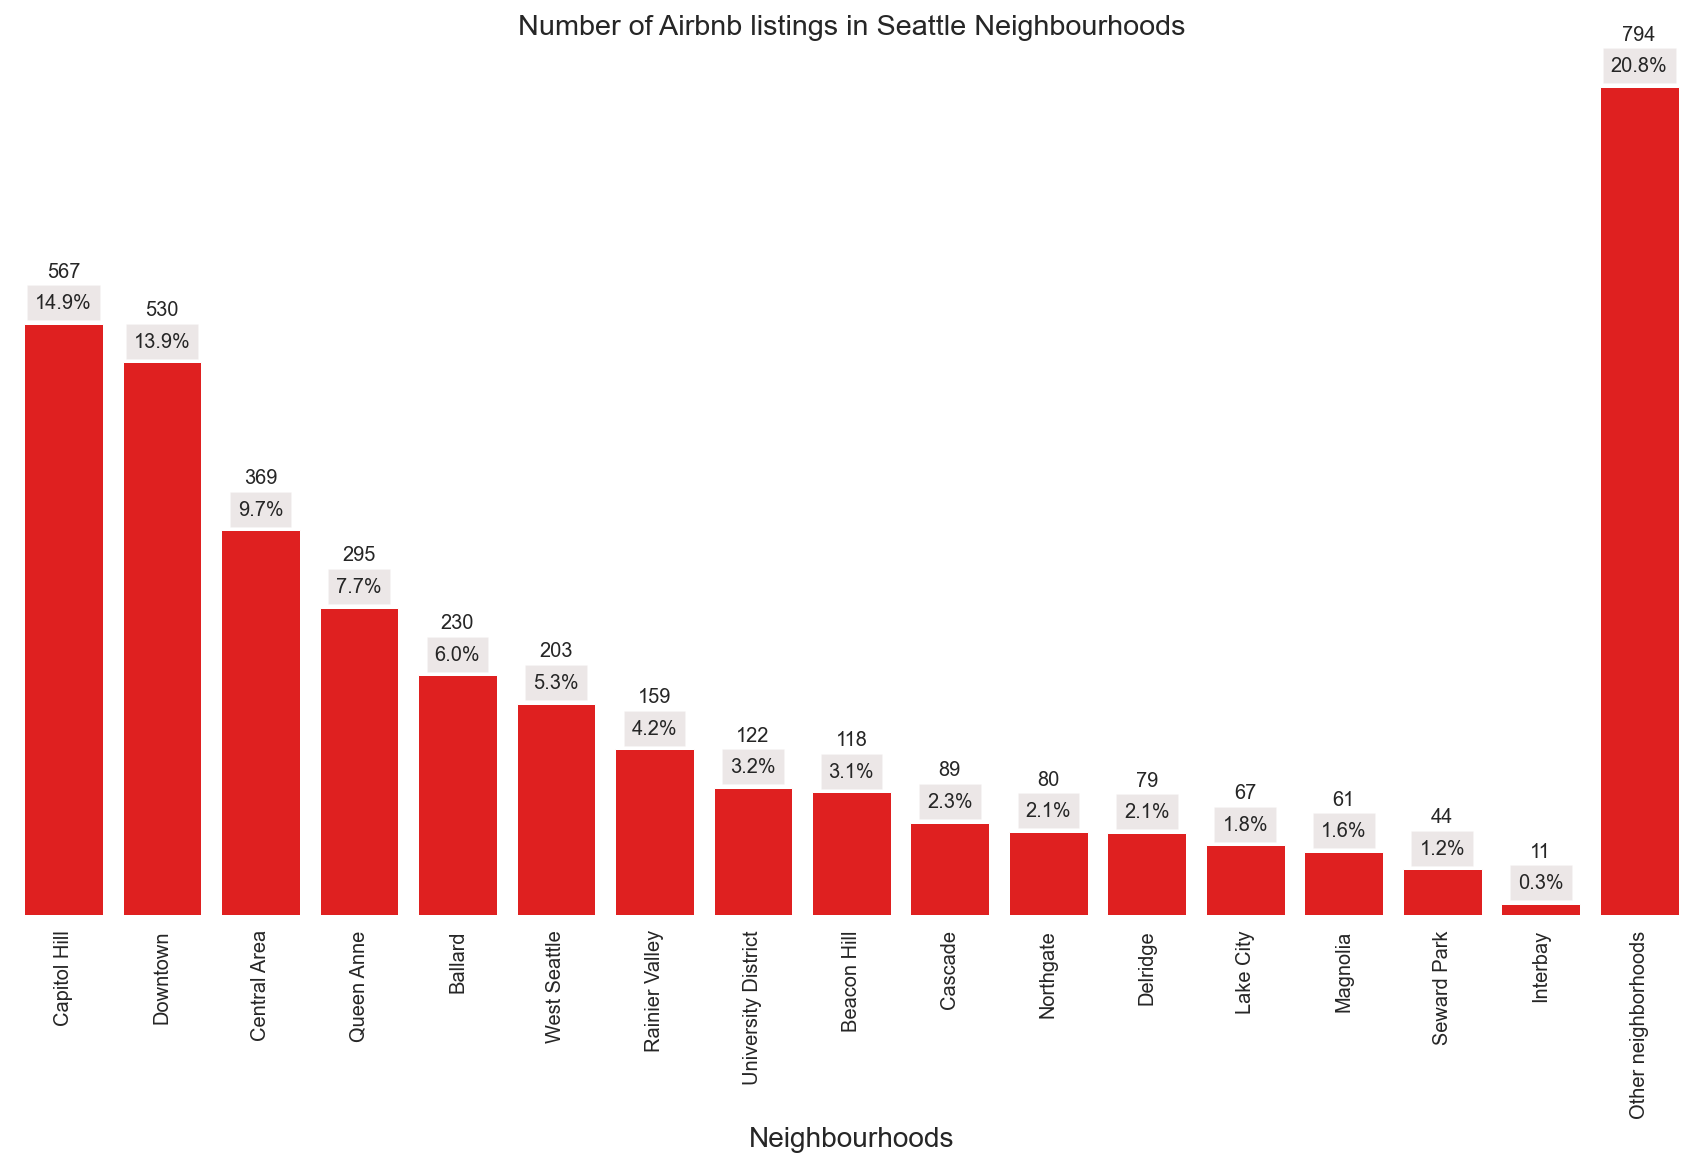

In [829]:
#Bar chart: How is the number of listings distributed across Neighbourhoods

neighbourhood_listings_count = pd.DataFrame(listings_clean_df['neighbourhood_group_cleansed'].value_counts())
neighbourhood_listings_count_sorted = neighbourhood_listings_count.sort_values('neighbourhood_group_cleansed', ascending=False)
neighbourhood_listings_count_sorted.reset_index(inplace=True)
neighbourhood_listings_count_sorted.rename(columns={"index": "neighbourhood_name"
                                           , "neighbourhood_group_cleansed": "count"}
                                           , inplace=True)
neighbourhood_listings_count_sorted_final = pd.concat([neighbourhood_listings_count_sorted[neighbourhood_listings_count_sorted.neighbourhood_name != 'Other neighborhoods']
                            ,neighbourhood_listings_count_sorted[neighbourhood_listings_count_sorted.neighbourhood_name == 'Other neighborhoods']])


# Defining the plot size
plt.figure(figsize=(15,8))
 
# Defining the values for x-axis, y-axis and from which dataframe the values are to be picked
plots = sns.barplot(x="neighbourhood_name", y="count", data=neighbourhood_listings_count_sorted_final, color=(1, 0, 0, 0.5))
 
# Iterrating over the bars one-by-one to annotate values
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()+35), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

# Compute percentages by neighourhood
percentage = list(neighbourhood_listings_count_sorted_final['count']/listings_clean_df['neighbourhood_group_cleansed'].shape[0])

# Iterrating over the bars one-by-one to annotate percentages 
patches = plots.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+15
   plots.annotate('{:.1f}%'.format(percentage[i]*100), (x, y), ha='center', Bbox = dict(facecolor= '#4D1B1D', alpha = .1))
 
# Setting the label for x-axis
plt.xlabel("Neighbourhoods", size=14)
plt.xticks(rotation='vertical')
 
# Setting the label for y-axis
plt.ylabel("Number", size=14)
 
# Setting the title for the graph
plt.title("Number of Airbnb listings in Seattle Neighbourhoods")

plots.yaxis.set_visible(False)
plt.box(False)
 
# Finally showing the plot
plt.show()

Capitol Hill and Downtown clearly appear as the popular neighbourhoods both accounting for ~+28% of the listings

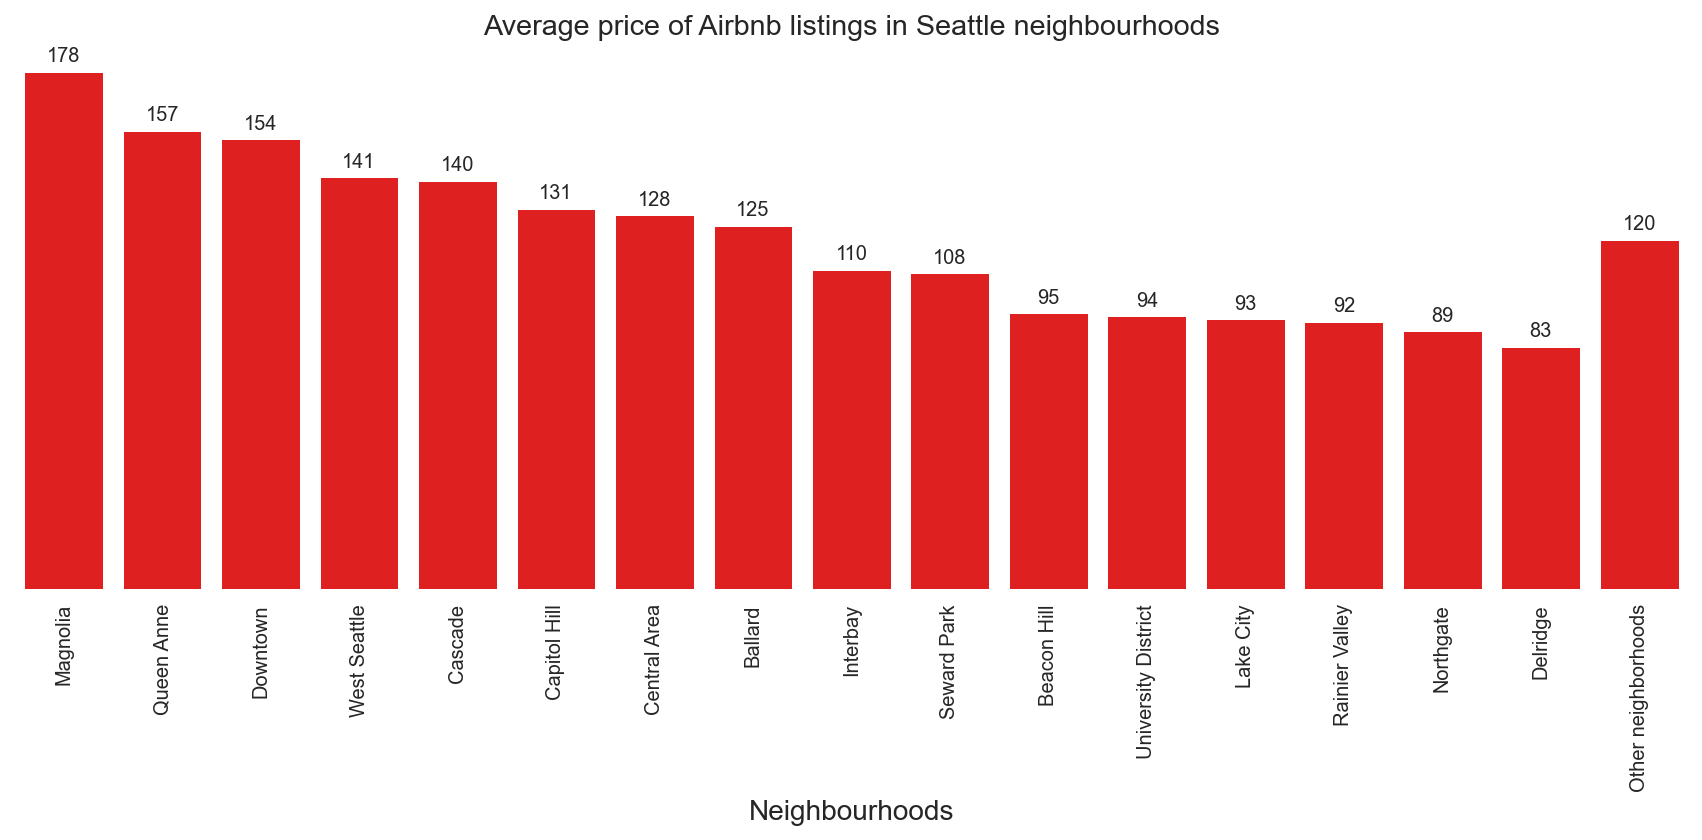

In [831]:
#Bar chart: What are the Average Prices per Neighbourhood?
neighbourhood_avg_prices = pd.DataFrame(listings_clean_df.groupby(['neighbourhood_group_cleansed']).mean()['price'])
neighbourhood_avg_prices_sorted = neighbourhood_avg_prices.sort_values('price', ascending=False)
neighbourhood_avg_prices_sorted.reset_index(inplace=True)
neighbourhood_avg_prices_sorted.rename(columns={"neighbourhood_group_cleansed": "neighbourhood_name"}
                                           , inplace=True)
neighbourhood_avg_prices_sorted_final = pd.concat([neighbourhood_avg_prices_sorted[neighbourhood_avg_prices_sorted.neighbourhood_name != 'Other neighborhoods']
                            ,neighbourhood_avg_prices_sorted[neighbourhood_avg_prices_sorted.neighbourhood_name == 'Other neighborhoods']])


# Defining the plot size
plt.figure(figsize=(15, 5))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="neighbourhood_name", y="price", data=neighbourhood_avg_prices_sorted_final, color=(1, 0, 0, 0.5))
 
# Iterrating over the bars one-by-one to annotate values
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Neighbourhoods", size=14)
plt.xticks(rotation='vertical')
 
# Setting the label for y-axis
plt.ylabel("Number", size=14)
 
# Setting the title for the graph
plt.title("Average price of Airbnb listings in Seattle neighbourhoods")

plots.yaxis.set_visible(False)
plt.box(False)
 
# Finally showing the plot
plt.show()

Average Prices range from 80 to 180 dollars. Magnolia and Queen Anne lead the race in terms of highest average price, 178 and 157 dollars respectively, with Downtown (2nd most popular neighbourhood) closing the podium at 154 dolars. The laggard neighbourhoods are Delridge and Northgate with prices ranging from 80 to 83 dollars.

These two grahs give us some clear indications:
1. Capitol Hill, Downtown and Central cover more than 1/3 of the listings, they are located in the central part of Seattle
2. The priciest neighbourhoods are close to the Elliot bay and Lake Union
3. South Neighbourhoods Average Prices tend to be lower
4. West Neighbourhoods Average Prices tend to be higher

In [844]:
Image(url= "https://northwesturbanist.files.wordpress.com/2016/08/seattle-neighborhood-districts-map.png", width=400, height=150)

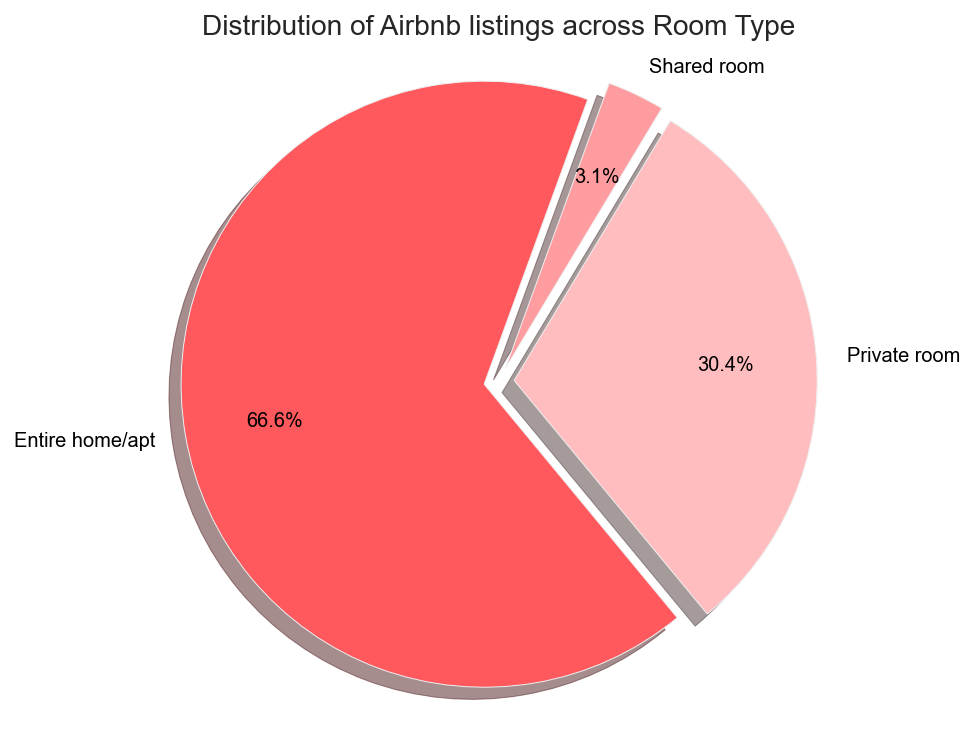

In [841]:
#Pie Chart Values: How are the listings spread across room types?

room_values = listings_clean_df.room_type.value_counts()
rooms_pct = (room_values/listings_clean_df.shape[0])

#Colors
colors = airbnb_color_palette()

#Plot
fig1, ax1 = plt.subplots(figsize=(7, 5))

#Explosion
explode = (0.05,0.05,0.05)
 
#Pie Chart 
plt.pie(list(rooms_pct.values), colors = colors, labels=rooms_pct.index, autopct='%1.1f%%', shadow=True, startangle=70, pctdistance=0.70, explode = explode, textprops={'fontsize': 10, 'color':"black"})


#Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Distribution of Airbnb listings across Room Type', fontsize=14, loc='center')
plt.show()

Listings are mostly entire homes or appartments, representing 2/3 of the listings. They are followed by private rooms with the remaining 1/3 of the listings.

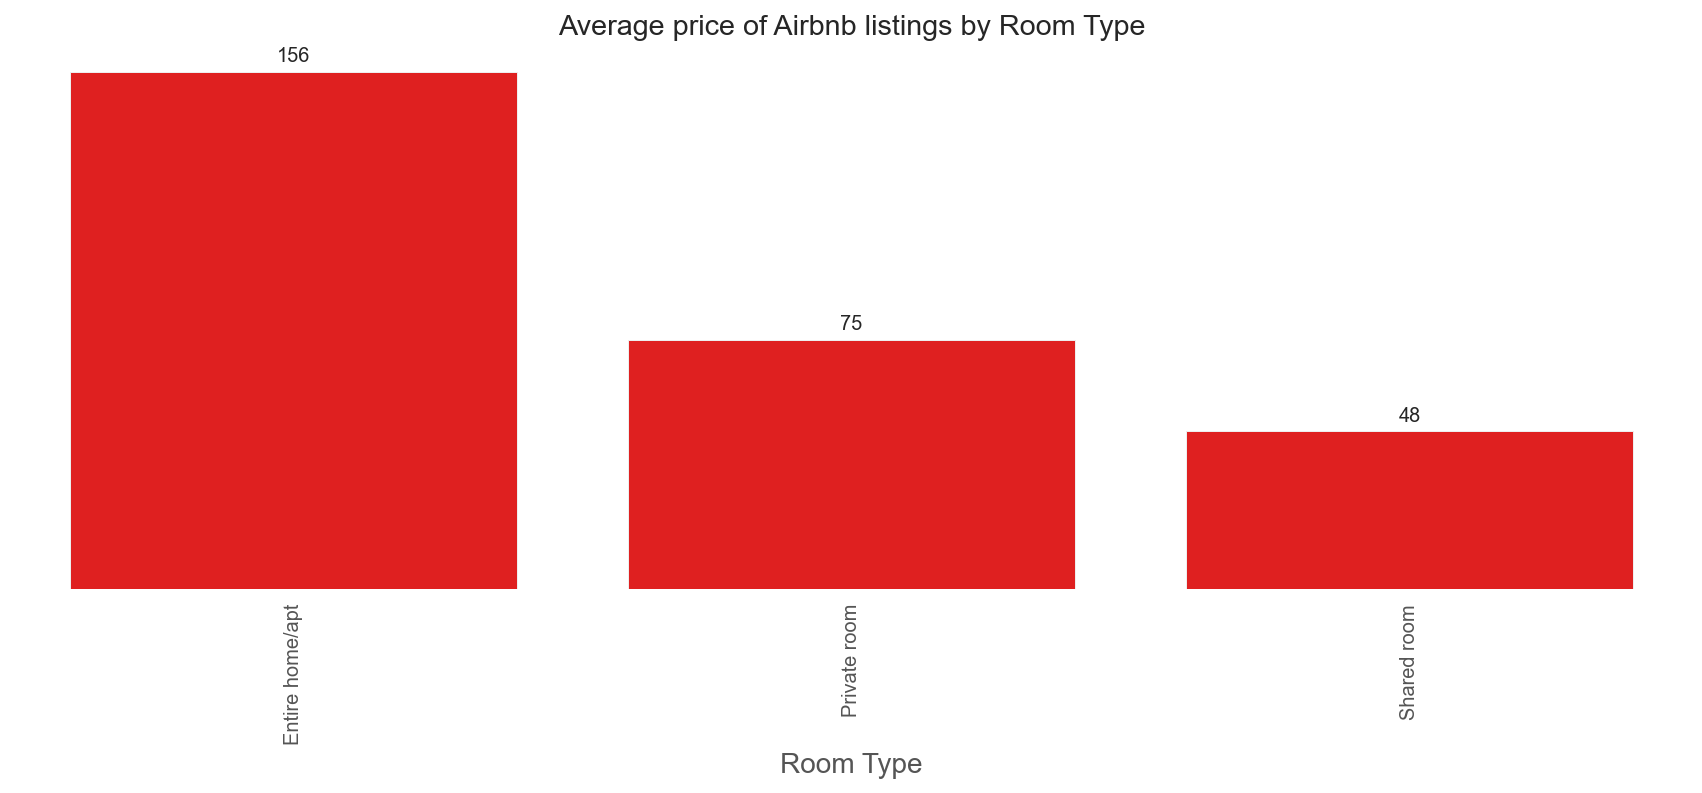

In [559]:
#Bar chart: What are the Average Prices per Room type?
room_type_avg_prices = pd.DataFrame(listings_clean_df.groupby(['room_type']).mean()['price'])
room_type_avg_prices_sorted = room_type_avg_prices.sort_values('price', ascending=False)
room_type_avg_prices_sorted.reset_index(inplace=True)


# Defining the plot size
plt.figure(figsize=(15, 5))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="room_type", y="price", data=room_type_avg_prices_sorted, color=(1, 0, 0, 0.5))
 
# Iterrating over the bars one-by-one to annotate values
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Room Type", size=14)
plt.xticks(rotation='vertical')
 
# Setting the label for y-axis
plt.ylabel("Number", size=14)
 
# Setting the title for the graph
plt.title("Average price of Airbnb listings by Room Type")

plots.yaxis.set_visible(False)
plt.box(False)
 
# Finally showing the plot
plt.show()

As expected, the Entire Home or Appartment as an average price 2 to 3 higher than its counterparts, standing at 156 dollars.

<ipython-input-614-6101396a43a7>:33: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plots.annotate('{:.1f}%'.format(percentage[i]*100), (x, y), ha='center', Bbox = dict(facecolor= '#4D1B1D', alpha = .1))


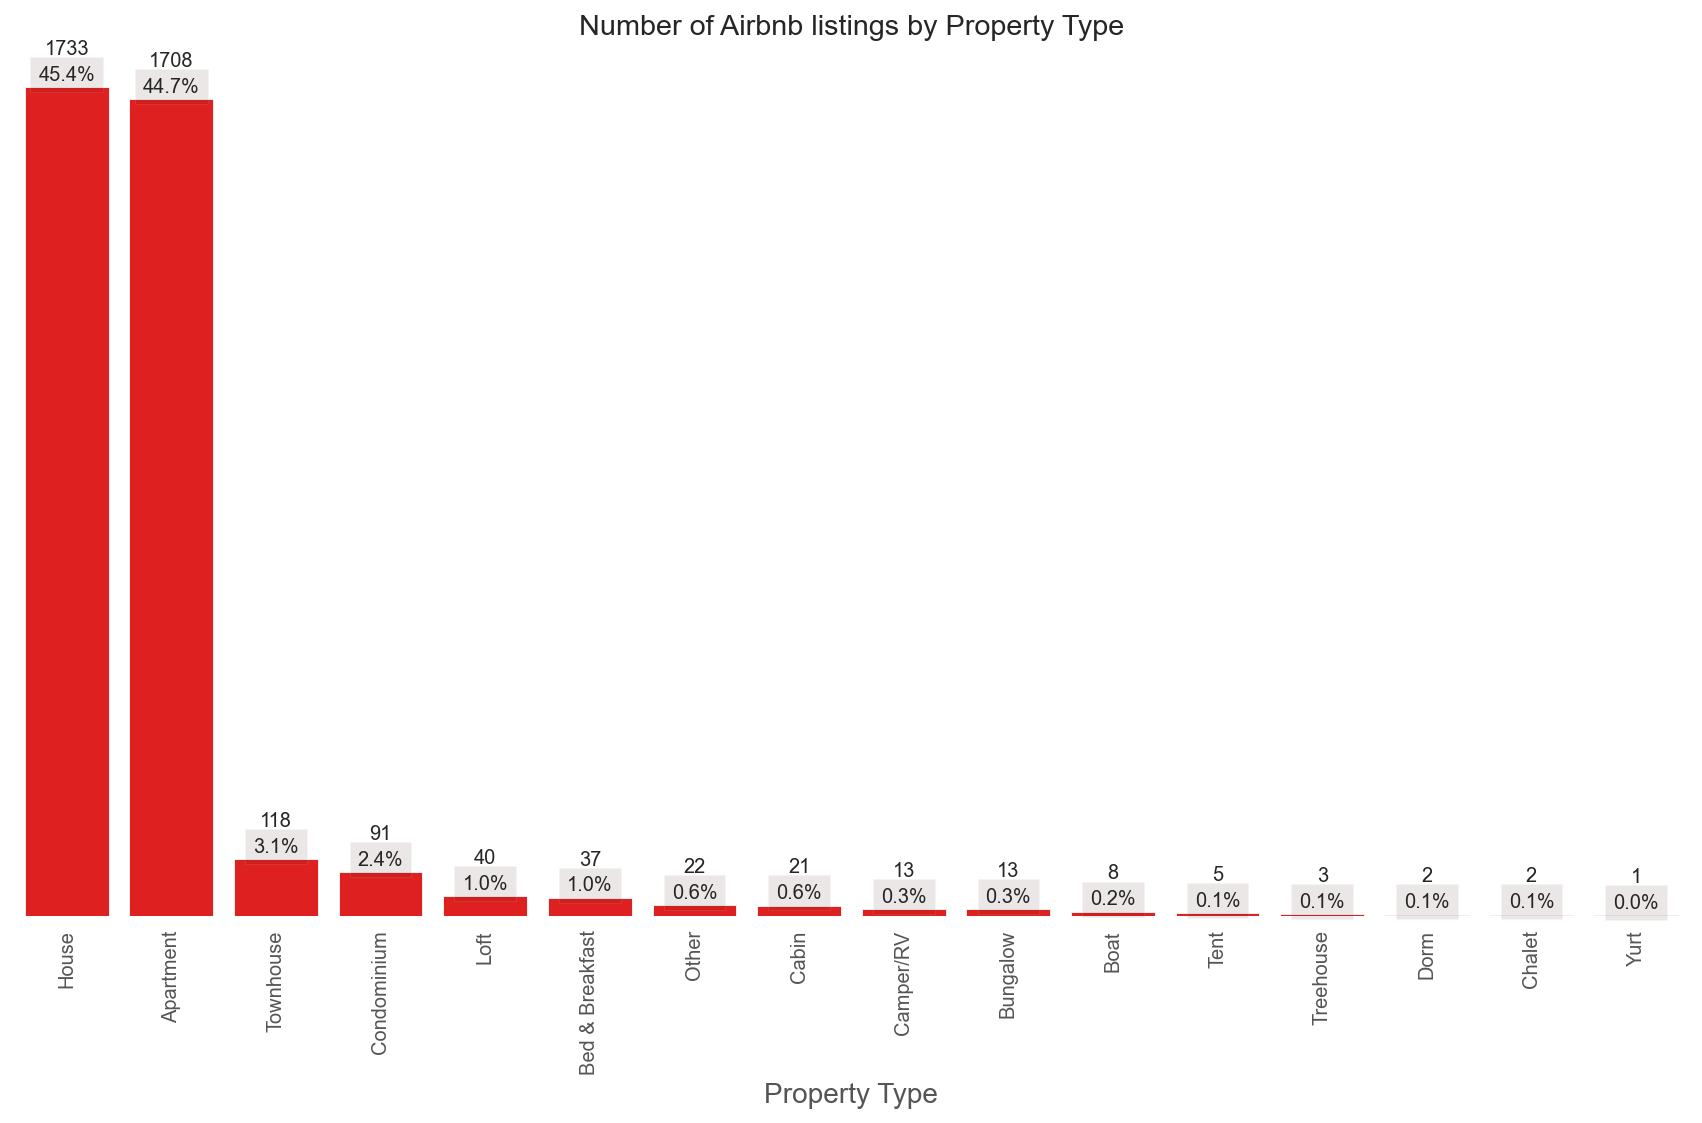

In [614]:
#Bar chart: How is the number of listings distributed across Property type

property_type_listings_count = pd.DataFrame(listings_clean_df['property_type'].value_counts())
property_type_listings_count_sorted = property_type_listings_count.sort_values('property_type', ascending=False)
property_type_listings_count_sorted.reset_index(inplace=True)
property_type_listings_count_sorted.rename(columns={"index": "property_type"
                                           , "property_type": "count"}
                                           , inplace=True)


# Defining the plot size
plt.figure(figsize=(15,8))
 
# Defining the values for x-axis, y-axis and from which dataframe the values are to be picked
plots = sns.barplot(x="property_type", y="count", data=property_type_listings_count_sorted, color=(1, 0, 0, 0.5))
 
# Iterrating over the bars one-by-one to annotate values  
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()+47), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

# Compute percentages by neighourhood
percentage = list(property_type_listings_count_sorted['count']/listings_clean_df['property_type'].shape[0])

# Iterrating over the bars one-by-one to annotate percentages 
patches = plots.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+15
   plots.annotate('{:.1f}%'.format(percentage[i]*100), (x, y), ha='center', Bbox = dict(facecolor= '#4D1B1D', alpha = .1))
 
# Setting the label for x-axis
plt.xlabel("Property Type", size=14)
plt.xticks(rotation='vertical')
 
# Setting the label for y-axis
plt.ylabel("Number", size=14)
 
# Setting the title for the graph
plt.title("Number of Airbnb listings by Property Type")

plots.yaxis.set_visible(False)
plt.box(False)
 
# Finally showing the plot
plt.show()

Houses and Apartments account for 90% of the Property Types in the Airbnb listings, with no major difference in the number of listings

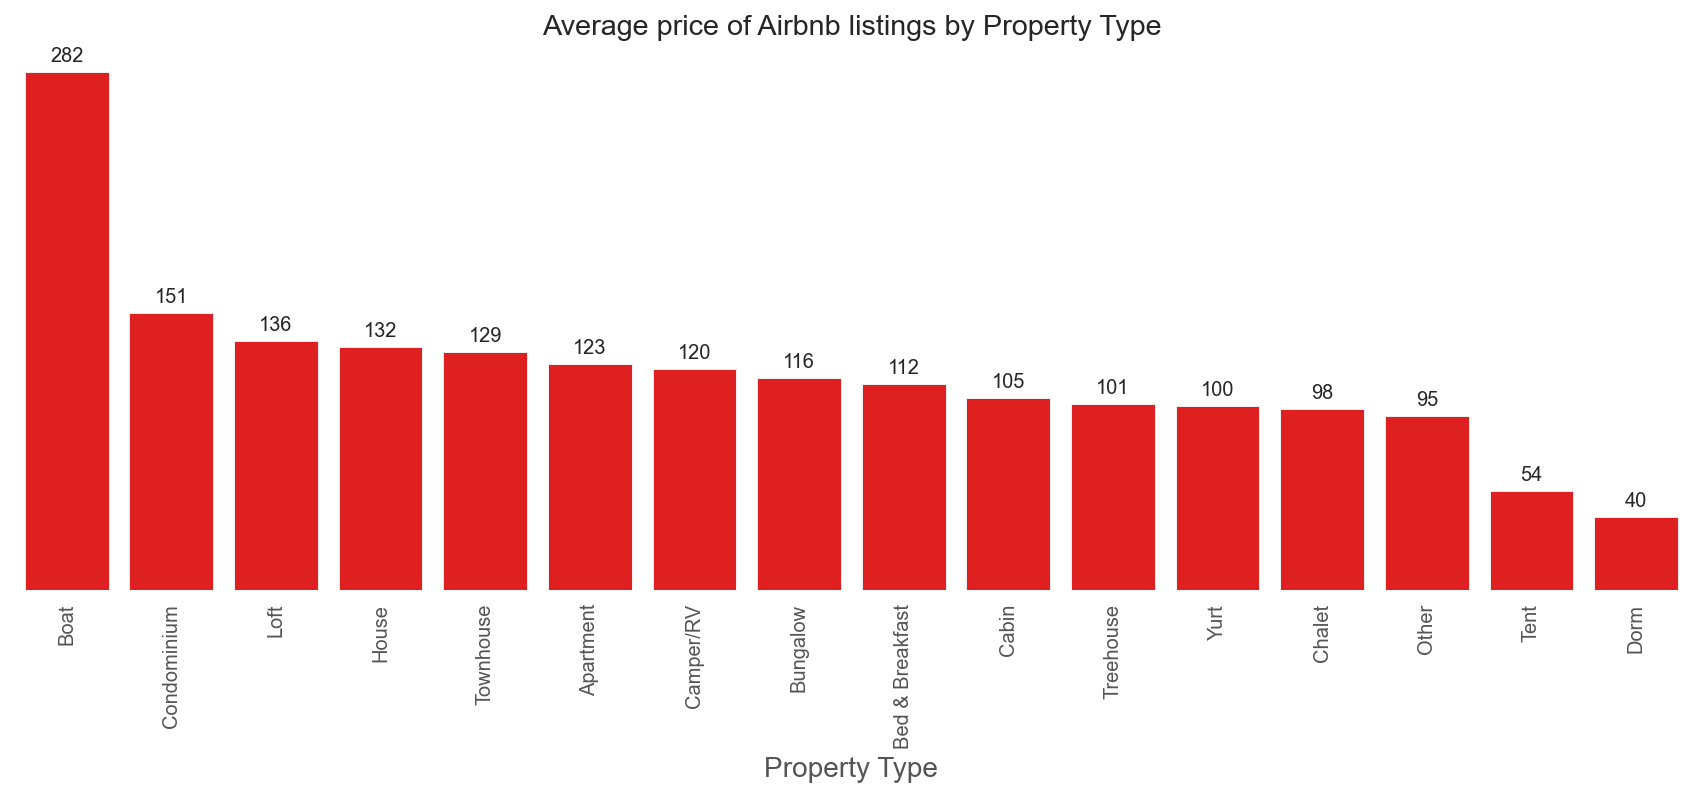

In [842]:
#Bar chart: What are the Average Prices per Property type?
property_type_avg_prices = pd.DataFrame(listings_clean_df.groupby(['property_type']).mean()['price'])
property_type_avg_prices_sorted = property_type_avg_prices.sort_values('price', ascending=False)
property_type_avg_prices_sorted.reset_index(inplace=True)

# Defining the plot size
plt.figure(figsize=(15, 5))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="property_type", y="price", data=property_type_avg_prices_sorted, color=(1, 0, 0, 0.5))
 
# Iterrating over the bars one-by-one to annotate values
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Property Type", size=14)
plt.xticks(rotation='vertical')
 
# Setting the label for y-axis
plt.ylabel("Number", size=14)
 
# Setting the title for the graph
plt.title("Average price of Airbnb listings by Property Type")

plots.yaxis.set_visible(False)
plt.box(False)
 
# Finally showing the plot
plt.show()

The 8 boats listed in Seattle's region have the highest average price, at 282 dollars. The gap between this category and the other properties is significant, with Condominium grabbing the second position at 151 dollars (-130€ than the Boats). Seattle is a city surrounded by water. The saltwater of Elliot Bay and Puget Sound borders the city to the west, while the massive Lake Washington offers freshwater to the east. This said, we clearly see an opporunity to expand the Boat Property Type and grow the luxury niche offered in Airbnb's website.

<ipython-input-843-b7335ba330e8>:33: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plots.annotate('{:.1f}%'.format(percentage[i]*100), (x, y), ha='center', Bbox = dict(facecolor= '#4D1B1D', alpha = .1))


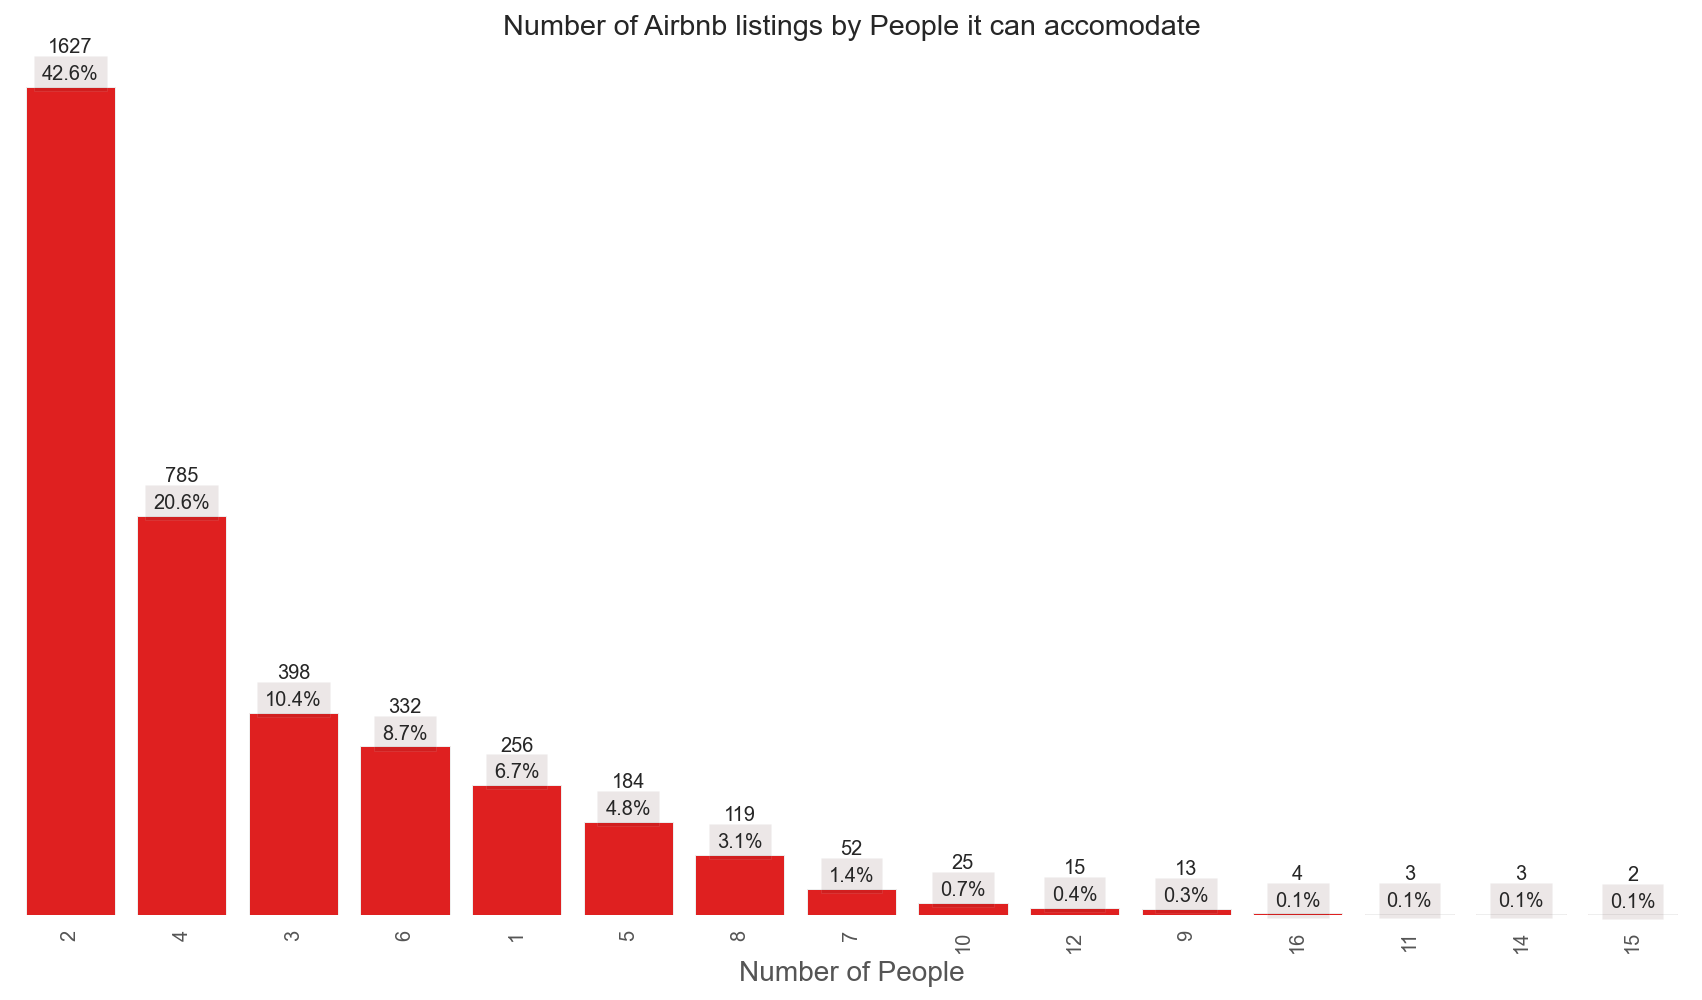

In [843]:
#Bar chart: How is the number of listings distributed across Number of People it can accomodate

people_accomodate_listings_count = pd.DataFrame(listings_clean_df['accommodates'].value_counts())
people_accomodate_listings_count_sorted = people_accomodate_listings_count.sort_values('accommodates', ascending=False)
people_accomodate_listings_count_sorted.reset_index(inplace=True)
people_accomodate_listings_count_sorted.rename(columns={"index": "accommodates"
                                           , "accommodates": "count"}
                                           , inplace=True)
people_accomodate_listings_count_sorted['accommodates'] = people_accomodate_listings_count_sorted['accommodates'].astype(str)

# Defining the plot size
plt.figure(figsize=(15,8))
 
# Defining the values for x-axis, y-axis and from which dataframe the values are to be picked
plots = sns.barplot(x="accommodates", y="count", data=people_accomodate_listings_count_sorted, color=(1, 0, 0, 0.5))
 
# Iterrating over the bars one-by-one to annotate values  
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()+47), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

# Compute percentages by neighourhood
percentage = list(people_accomodate_listings_count_sorted['count']/listings_clean_df['accommodates'].shape[0])

# Iterrating over the bars one-by-one to annotate percentages 
patches = plots.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+15
   plots.annotate('{:.1f}%'.format(percentage[i]*100), (x, y), ha='center', Bbox = dict(facecolor= '#4D1B1D', alpha = .1))
 
# Setting the label for x-axis
plt.xlabel("Number of People", size=14)
plt.xticks(rotation='vertical')
 
# Setting the label for y-axis
plt.ylabel("Number", size=14)
 
# Setting the title for the graph
plt.title("Number of Airbnb listings by People it can accomodate")

plots.yaxis.set_visible(False)
plt.box(False)
 
# Finally showing the plot
plt.show()

Almost half of the Airbnb listings can accomodate 2 people. Directly followed by 4 and 3 people acounting in total for ~+30% of the listings. This means ~+70% of the Airbnb listings can accomodate not more than a 4-people household.

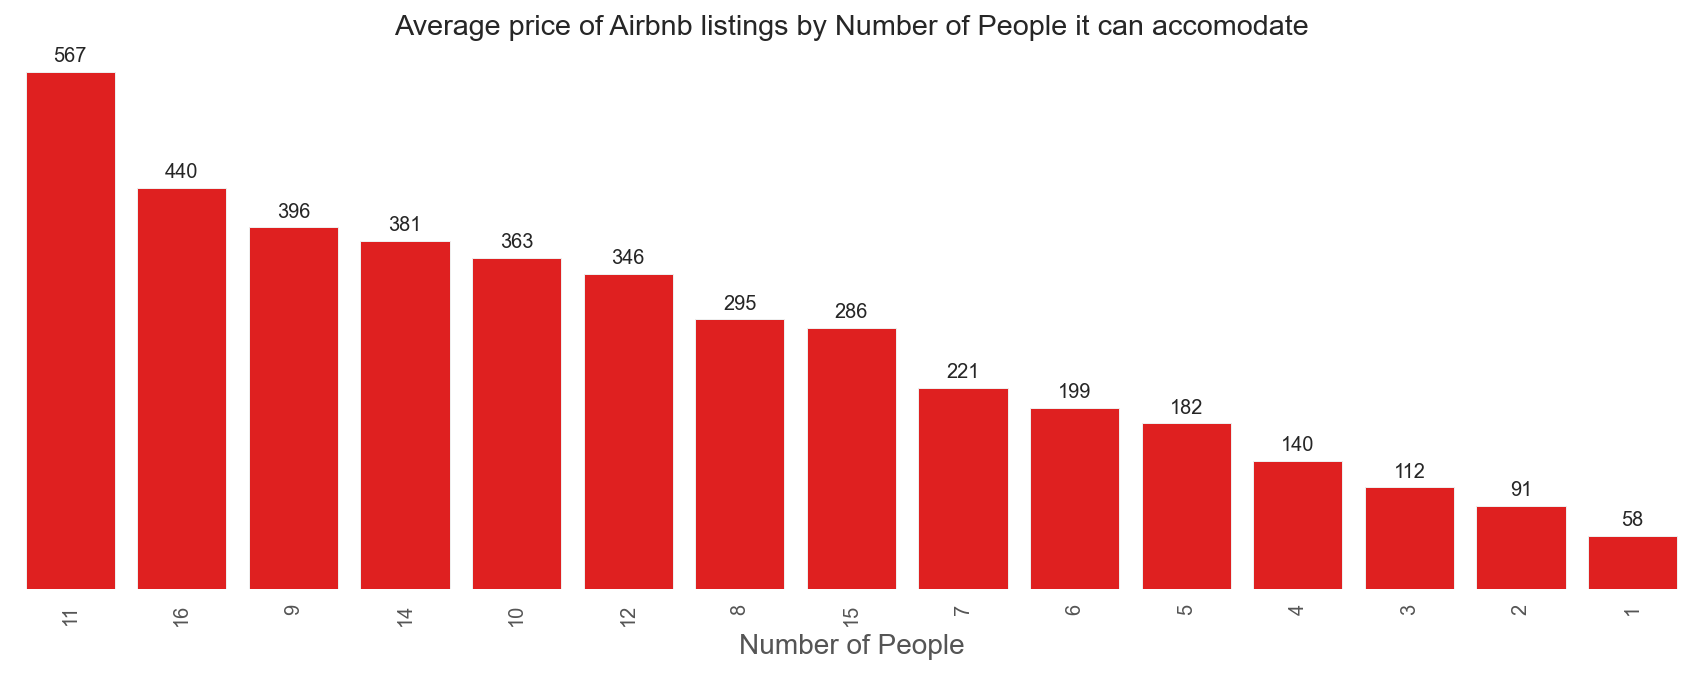

In [617]:
#Bar chart: What are the Average Prices per Room type?
accomodate_avg_prices = pd.DataFrame(listings_clean_df.groupby(['accommodates']).mean()['price']).reset_index()
accomodate_avg_prices['accommodates'] = accomodate_avg_prices['accommodates'].astype(str)
accomodate_avg_prices_sorted = accomodate_avg_prices.sort_values('price', ascending=False)
accomodate_avg_prices_sorted.reset_index(inplace=True)

# Defining the plot size
plt.figure(figsize=(15, 5))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="accommodates", y="price", data=accomodate_avg_prices_sorted, color=(1, 0, 0, 0.5))
 
# Iterrating over the bars one-by-one to annotate values
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Number of People", size=14)
plt.xticks(rotation='vertical')
 
# Setting the label for y-axis
plt.ylabel("Number", size=14)
 
# Setting the title for the graph
plt.title("Average price of Airbnb listings by Number of People it can accomodate")

plots.yaxis.set_visible(False)
plt.box(False)
 
# Finally showing the plot
plt.show()

The relationship between the number of accomodates is quite linear in terms of prices, the highest the average price the highest the number of people we can accomodate, with one or two exceptions (however not significant in number of listings)

<a id="Prediction"></a>

## 3.3 Question 3: How accurately can we predict the Price of the Listings?

[Return to Table of content](#TableContent)

A first exploration has been done for Seasonality and Key Features on Average Prices, this offered us a sharp view on how is the Listings Market Distributed in terms of Representativeness and Price. However, tons of other features could have a say on the Listings Pricing. To answer this last question, we will gather a set of features from the Listings table and try to predict the price of the listings. This will help us as well to determine the features with a strong explanatory power in the prediction and makes us aware of what features can impact the price when setting up a listing.



<a id="DataPreProcessing"></a>
### 3.3.1 Data Pre-Processing

[Return to Table of content](#TableContent)

**Let's now try to model the relationship between variables and price**

First step will be to remove the categorical variables that were used to do the previous explanatory analysis

In [847]:
#Remove Cat Variables = Object
listings_prediction_df = listings_clean_df.drop(listings_clean.select_dtypes(include=['object']).columns, axis=1)

In [848]:
#Check Data Types
listings_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 84 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   host_response_rate                                3295 non-null   float64
 1   host_acceptance_rate                              3045 non-null   float64
 2   host_is_superhost                                 3816 non-null   float64
 3   host_listings_count                               3816 non-null   float64
 4   host_total_listings_count                         3816 non-null   float64
 5   host_has_profile_pic                              3816 non-null   float64
 6   host_identity_verified                            3816 non-null   float64
 7   is_location_exact                                 3818 non-null   int64  
 8   accommodates                                      3818 non-null   int64  
 9   bathrooms          

In [849]:
#Let's have a deeper look at the missing values
missing_values = pd.DataFrame((len(listings_prediction_df)-listings_prediction_df.count())/len(listings_prediction_df)*100).reset_index()
missing_values.columns = ['field', 'percentage_nulls']
missing_val_df = missing_values[missing_values['percentage_nulls']>0].sort_values('percentage_nulls',ascending=False)
missing_val_df

,field,percentage_nulls
13,security_deposit,51.12624
14,cleaning_fee,26.97748
1,host_acceptance_rate,20.24620
27,review_scores_checkin,17.23415
25,review_scores_accuracy,17.23415
30,review_scores_value,17.18177
29,review_scores_location,17.15558
26,review_scores_cleanliness,17.10320
28,review_scores_communication,17.05081
24,review_scores_rating,16.94605


**Remarks**: 

0. Being myself a regular customer of Airbnb, I know most of the listings don't ask for a Deposit (at least in Europe). The same applies for the cleaning fee. This means we can input a zero in the missing values of this column
1. The Host Acceptance Rate appears second on the list and displays 20% of missing values. This one might relate to the Host Response Rate which has ~14% of missing values. Let's compute the correlation of these features with the remaining variables to assess whether we keep them or not
2. Next on the list, we have all the review scores on a scale of 10. For these we will opt for the mean to fill the NaNs as the mean can be a trustful metric to keep these features coherent
3. The Reviews per Month feature acounts for the number of reviews in a month, a NaN should then be equal to zero
4. The rest of the columns have less than 1% of missing values, we will then fill them with zero

**Apply modifications**

In [850]:
#Steo 0 - Populate the NaNs of these Security and Cleaning Fee with zeros
features = ['security_deposit','cleaning_fee']

for features in features:
    listings_prediction_df[features] = np.where(listings_prediction_df[features] > 0, listings_prediction_df[features], 0)

In [851]:
#Step 1.1 - Correlation of the Host Acceptance Rate
corr_df = pd.DataFrame(listings_prediction_df.corr()['host_acceptance_rate']).abs().sort_values('host_acceptance_rate', ascending=False)
corr_df.columns = ['correlation_absolute_value']
corr_df[:10]

,correlation_absolute_value
host_acceptance_rate,1.00000
bed_type_Pull-out Sofa,0.15514
room_type_Shared room,0.09544
bed_type_Real Bed,0.08988
neighbourhood_group_cleansed_Capitol Hill,0.04387
host_response_time_within a day,0.04139
instant_bookable,0.03913
host_identity_verified,0.03843
room_type_Entire home/apt,0.02590
cancellation_policy_moderate,0.02546


No meaningful correlation can be derived from the above table.

In [852]:
#Step 1.2 - Correlation of the Host Response Rate
corr_df = pd.DataFrame(listings_prediction_df.corr()['host_response_rate']).abs().sort_values('host_response_rate', ascending=False)
corr_df.columns = ['correlation_absolute_value']
corr_df[:10]

,correlation_absolute_value
host_response_rate,1.00000
host_response_time_a few days or more,0.54711
host_response_time_within a day,0.34250
host_response_time_within an hour,0.33068
reviews_per_month,0.17114
review_scores_cleanliness,0.17090
review_scores_rating,0.15657
review_scores_communication,0.15535
host_is_superhost,0.15381
review_scores_value,0.14948


Correlations seem higher than the ones extracted from the Host Acceptance Rate but still not relevant enough. 
We will drop the two features.

In [853]:
# Step 1 - Drop Host Response and Acceptance Rates
listings_prediction_df = listings_prediction_df.drop(['host_acceptance_rate','host_response_rate'], axis = 1)

In [854]:
#Step 2 - Fill Review Scores with mean
features = ['review_scores_checkin', 'review_scores_accuracy', 'review_scores_value', 'review_scores_location',
           'review_scores_cleanliness', 'review_scores_communication', 'review_scores_rating']
for feature in features:
    listings_prediction_df[feature] = listings_prediction_df[feature].fillna(listings_prediction_df[feature].mean())

In [758]:
#Step 3 - Fill Review per Months with zero
listings_prediction_df['reviews_per_month'] = listings_prediction_df['reviews_per_month'].fillna(0)

In [855]:
#Step 4 - Fill the other variables with zero
# Columns with still missing values
missing_values_cols = list(listings_prediction_df.columns[listings_prediction_df.isnull().mean() > 0])

# Fill with the mean
for col in missing_values_cols:
    listings_prediction_df[col] = listings_prediction_df[col].fillna(listings_prediction_df[col].mean())

In [856]:
#Overview
listings_prediction_df.head(3)

,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,0.00000,3.00000,3.00000,1.00000,1.00000,1,4,1.00000,1.00000,1.00000,85.00000,0.00000,0.00000,2.00000,5.00000,1,365,14,41,71,346,207,95.00000,10.00000,10.00000,10.00000,10.00000,9.00000,10.00000,0,0,0,2,4.07000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,1.00000,6.00000,6.00000,1.00000,1.00000,1,4,1.00000,1.00000,1.00000,150.00000,100.00000,40.00000,1.00000,0.00000,2,90,13,13,16,291,43,96.00000,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000,0,1,1,6,1.48000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,0.00000,2.00000,2.00000,1.00000,1.00000,1,11,4.50000,5.00000,7.00000,975.00000,1000.00000,300.00000,10.00000,25.00000,4,30,1,6,17,220,20,97.00000,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000,0,0,0,2,1.15000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


Time to have a first look at the correlation of these 82 features and the Price

In [857]:
#Correlation of the Price
corr_df = pd.DataFrame(listings_prediction_df.corr()['price']).abs().sort_values('price', ascending=False)
corr_df.columns = ['correlation_absolute_value']
corr_df[:20]

,correlation_absolute_value
price,1.00000
accommodates,0.65222
bedrooms,0.62760
beds,0.58931
cleaning_fee,0.57642
bathrooms,0.51602
room_type_Entire home/apt,0.43562
guests_included,0.39288
room_type_Private room,0.38750
security_deposit,0.33358


<a id="LinearRegression"></a>

### 3.3.2 Modelling - Linear Regression

[Return to Table of content](#TableContent)

In [902]:
#Keep features with a correlation above 0.2 to run the Regression. Threshold of 0.2 can of course be changed
correlation = pd.DataFrame(listings_prediction_df.corr()['price']).abs().sort_values('price', ascending=False).reset_index()
correlation.columns = ['column', 'correlation']
correlation_less_than_x = list(correlation[correlation['correlation'] <= 0.20]['column'])
listings_prediction_final_df = listings_prediction_df.drop(correlation_less_than_x, axis = 1)

In [903]:
# Remove features with less than x% correlation 
# Get X and y
X = listings_prediction_final_df.drop('price',axis=1)
y = listings_prediction_final_df['price']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) 
    
# Normalize the data
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))

# Instantiate and fit the model
lm_model = LinearRegression() # Instantiate
lm_model.fit(X_train, y_train) #Fit

# Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

# Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

#Parameters
params = np.append(lm_model.intercept_, lm_model.coef_)
    
# Get the regression coefficients
coefs_df = pd.DataFrame()
coefs_df['est_int'] = X.columns
coefs_df['coefs'] = lm_model.coef_
coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)

In [904]:
#R Square Scores
train_score, test_score

(0.5461938884872666, 0.5430086262008222)

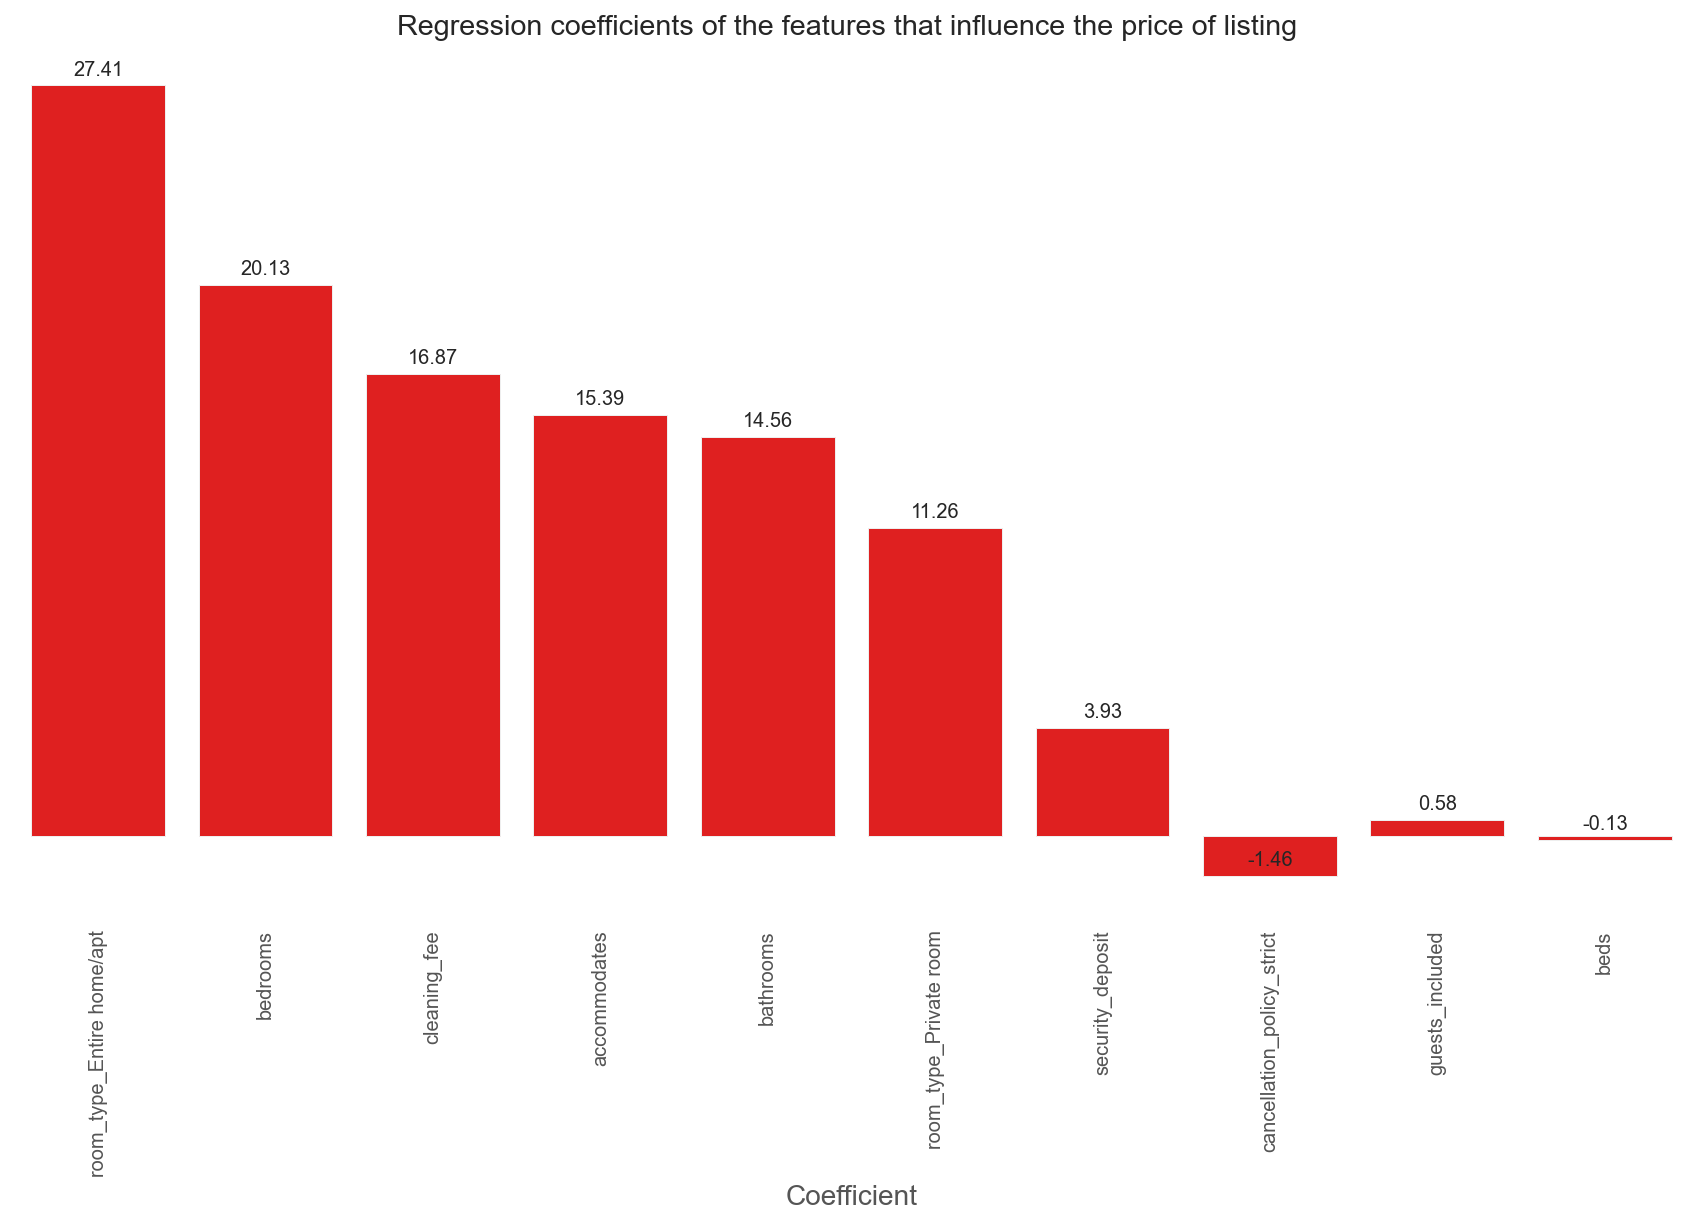

In [905]:
# Interpret results by analysing each feature coefficient
coef_df = coefs_df.sort_values('abs_coefs', ascending=False).drop('abs_coefs',axis=1)

# Defining the plot size
plt.figure(figsize=(15,8))

# Defining the values for x-axis, y-axis and from which dataframe the values are to be picked
plots = sns.barplot(x="est_int", y="coefs", data=coef_df, color=(1, 0, 0, 0.5))

# Iterrating over the bars one-by-one to annotate values  
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

# Setting the label for x-axis
plt.xlabel("Coefficient", size=14)
plt.xticks(rotation='vertical')
 
# Setting the label for y-axis
plt.ylabel("Feature", size=14)
 
# Setting the title for the graph
plt.title("Regression coefficients of the features that influence the price of listing ")

plots.yaxis.set_visible(False)
plt.box(False)
 
# Finally showing the plot
plt.show()

Theory: https://statsandr.com/blog/multiple-linear-regression-made-simple/

We get respectively an R-Square of 0.546 and 0.543 for the training and test set. In terms of Interpretability, the feature "Room type/Entire Home/Appartment" displays the highest coefficient (27.41), followed by Bedrooms (20.13) and Cleaning Fee (16.87)

To conclude, we are not too enthusiastic about these results. If further improvements were to be done, we could eventually tweak the analysis by optimizing and/or improve the features and hyper parameters embedded in this model to slightly boost the performance.

But instead, we will try other models, split the dataset into k consecutive folds and compare results as it's less time consuming.

<a id="OtherModels"></a>

### 3.3.3 Modelling - Other Models

[Return to Table of content](#TableContent)

C:\Users\robin.hocepied\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\robin.hocepied\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\robin.hocepied\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Inc

,R-Square Score
RandomForest,0.54985
Ridge,0.54676
Lasso,0.54675
Linear,0.54675
Bayesian Ridge,0.54654
Hubber,0.52405
SVM Linear,0.51775
Bagging,0.50476
AdaBoost,0.23118
SVM RBF,0.15178


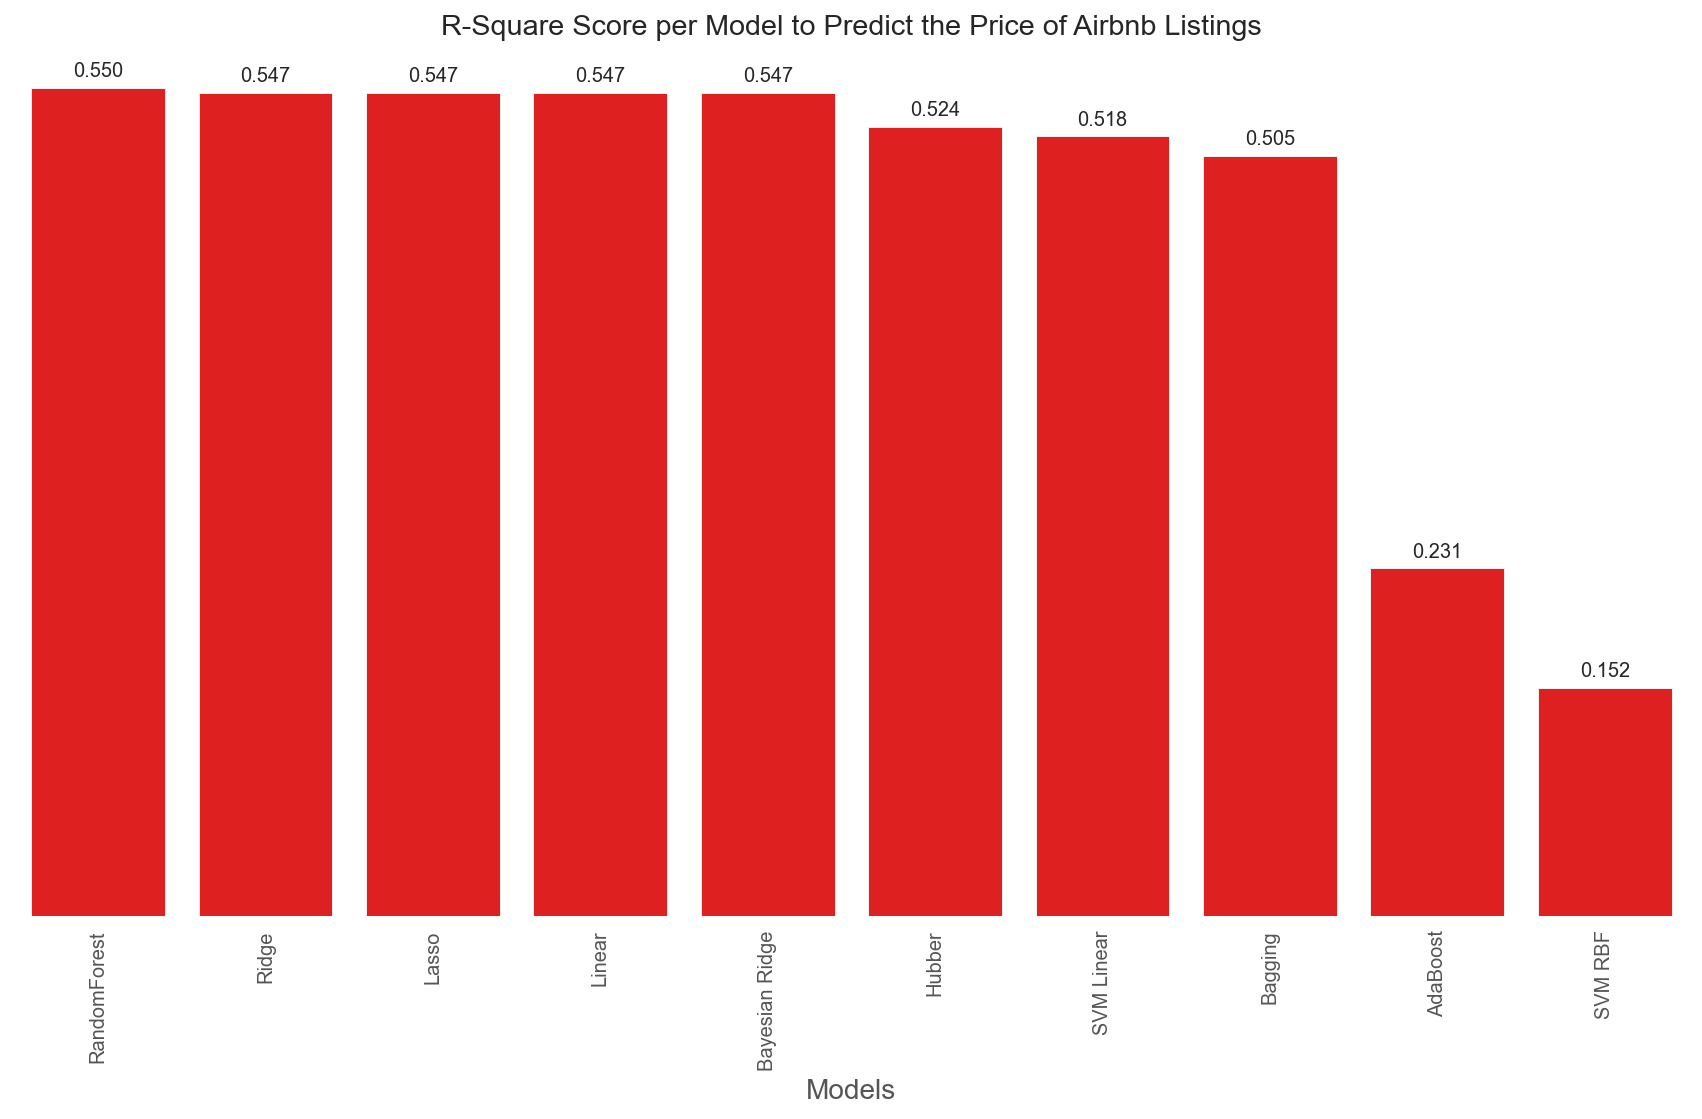

In [906]:
# Try other models

# Function to run the models
def test_model(model):
    # K-Folds cross-validator: Provides train/test indices to split data in train/test sets. 
    # Split dataset into k consecutive folds (without shuffling by default).
    cross_validator = KFold(n_splits = 3, shuffle = True, random_state = 42)

    # Make a scorer from a performance metric or loss function.
    r2_scorer = make_scorer(r2_score)

    # Evaluate a score by cross-validation
    r2_cross_validation_score = cross_val_score(model, X, y, cv = cross_validator, scoring = r2_scorer)
    
    #Mean score of train and test r-square 
    scores = [r2_cross_validation_score.mean()]
    
    return scores

# Models

results={}

model = linear_model.LinearRegression()
results["Linear"] = test_model(model)
    
model = linear_model.Ridge()
results["Ridge"] = test_model(model)
    
model = linear_model.BayesianRidge()
results["Bayesian Ridge"] = test_model(model)
    
model = linear_model.HuberRegressor()
results["Hubber"] = test_model(model)
    
model = linear_model.Lasso(alpha = 1e-4)
results["Lasso"] = test_model(model)
    
model = BaggingRegressor()
results["Bagging"] = test_model(model)
    
model = RandomForestRegressor()
results["RandomForest"] = test_model(model)
    
model = AdaBoostRegressor()
results["AdaBoost"] = test_model(model)
    
model = svm.SVR()
results["SVM RBF"] = test_model(model)
    
model = svm.SVR(kernel = "linear")
results["SVM Linear"] = test_model(model)

#Add results to a DF and sort the scores by value
results = pd.DataFrame.from_dict(results, orient = 'index')
results.columns=["R-Square Score"] 
results = results.sort_values(by = ["R-Square Score"], ascending=False)


# Defining the plot size
plt.figure(figsize=(15,8))

# Defining the values for x-axis, y-axis and from which dataframe the values are to be picked
plots = sns.barplot(x = results.index, y = "R-Square Score", data = results, color = (1, 0, 0, 0.5))

# Iterrating over the bars one-by-one to annotate values  
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.3f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha = 'center', va = 'center',
                   size = 10, xytext = (0, 8),
                   textcoords='offset points')

# Setting the label for x-axis
plt.xlabel("Models", size=14)
plt.xticks(rotation='vertical')
 
# Setting the label for y-axis
plt.ylabel("R Square", size=14)
 
# Setting the title for the graph
plt.title("R-Square Score per Model to Predict the Price of Airbnb Listings")

plots.yaxis.set_visible(False)
plt.box(False)

results

Results are approximately the same when we compute the mean of the R-Square Training and Test Set in 9 other different models. 

If we were to keep a model, we would definitely select the Linear Regression, as this one can be easily interpreted by assessing the coefficients of each of the features used in the model.

<a id="Conclusion"></a>
# 4. Conclusion


[Return to Table of content](#TableContent)

I'd like to conclude by offering some of the key insights that unravelled some of the doubts/questions we had when starting this analysis. Additionally, a set of three recomendations will be added in case other "data junkies" were to pursue further analysis on this work.

Here below a non exhaustive list of the findings:

1. There is a strong **Seasonality** pattern in the average prices evolution over time. July and August have the highest average prices, indicating weather and rainfall % play an important role in the seasonal offering. Drilling down to the weekly view, as we would expect, Fridays and Saturdays are the most "profitable" days from a lender's perspective.
 
 
2. **Neighbourhood** wise, most of the listings are located in the central area of Seattle between Elliot Bay and Lake Washington. The listings with the highest average prices stand close to the central west part, bordering the Elliot Bay and the Puget Sound.  West tends to be more expensive than the East, while the South part is less expensive than the North. The prices range from 80 to 180 dollars a night.


3. If we look at the **Types of Properties**, listings are mostly entire homes or appartments, representing 2/3 of the listings. These are 2 to 3 times more expensive than its counterparts (Private and Shared Room) standing at 156 dollars.


4. Houses and Apartments account for 90% of the **Property Types** (16 Types) in the Airbnb listings, with no major difference in the number of listings. All Property types display similar Average Prices, ranging from 95 to 150 dollars (3 exceptions), the most interesting one is the Boat type (first in the list) which seems to be a luxury niche with an Average Price at almost 300 dollars a night.


5. Almost half of the Airbnb listings can **Accomodate** 2 people. Directly followed by 4 and 3 people acounting in total for ~+30% of the listings. This means ~+70% of the Airbnb listings can accomodate not more than a 4-people household. The relationship between the number of accomodates is quite linear in terms of prices, the highest the average price the highest the number of people we can accomodate, with one or two exceptions (however not significant in number of listings)


6. For the **Prediction of the Listing Price**, the Linear Regression offers us the best results if we bear in mind interpretability and results of the 10 models. We get respectively an R-Square of 0.546 and 0.543 for the training and test set. In terms of Interpretability, the feature "Room type/Entire Home/Appartment" displays the highest coefficient (27.41), followed by Bedrooms (20.13) and Cleaning Fee (16.87). To conclude, we are not too enthusiastic about these results. If further improvements were to be done, we could eventually tweak the analysis by optimizing and/or improve the features and hyper parameters embedded in this model to slightly boost the performance.

Recomendations:

1. Analyze evolutionary trend of Average Prices per Neighbourhood, per Property Type and per Nb of Accomodation
2. Analyze specific features of the Listings dataset, such as the cleaning fee, and draw relationships between these and the price
3. Analyze Reviews dataset, draw some questions and explore them. E.g. What are the concepts hosts and guests are using to describe their residence and experiences?

